In [15]:
from PIL import Image,ImageDraw, ImageShow
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull, convex_hull_plot_2d


In [2]:


# Create empty black canvas
width = 1000
height=1000

im = Image.new('RGB', (width, height))

# Draw red and yellow triangles on it and save
draw = ImageDraw.Draw(im)

'''
draw.polygon([(20,10), (200, 200), (100,20)], fill = (255,0,0))
draw.polygon([(200,10), (200, 200), (150,50)], fill = 'yellow')
'''

max_val=950
min_val=800

x = int(random.randint((1000-max_val), (1000-min_val))/1000*width)
y = int(random.randint((1000-max_val), (1000-min_val))/1000 * height)
print(y)
tissue_width = int(random.randint(min_val, max_val)/1000*width)
print(tissue_width)
tissue_height = int(random.randint(min_val, max_val)/1000*height)


draw.rectangle([(x, y), (x +tissue_width, y + tissue_height)], fill='purple')

im.show()

159
855


In [3]:
x_list = np.random.normal(loc=100, scale=100, size=2000)

In [4]:
x_list = [int(x_list[i]) for i in range(len(x_list))]

In [5]:
y_list = random.choices(range(int(y), int(y+tissue_height)), k=2000)

In [6]:
y_list = np.random.normal(loc=500, scale=100, size=2000)

In [7]:
y_list = [int(y_list[i]) for i in range(len(y_list))]

In [8]:
for i in range(len(x_list)):
    if (x_list[i] in range(x, x + tissue_width)) and (y_list[i] in range(y, y + tissue_height)) :
        draw.rectangle([(x_list[i], y_list[i]), (x_list[i] + 5, y_list[i] + 5)], fill='red')
    

In [9]:
im.show()

In [10]:
np.random.normal(loc=10, scale=5, size=10)

array([26.7231392 , 14.35892572, 11.04861175,  5.71465755, 14.4730534 ,
        6.63572237,  8.57693099, 16.53069135, 13.02684948,  6.41811727])

In [11]:
from scipy.stats import gennorm

In [12]:
beta = 1.3

In [13]:
mean, var, skew, kurt = gennorm.stats(beta, moments='mvsk')

In [14]:
rv = gennorm(beta)
r = gennorm.rvs(beta, loc=10,scale=10, size=100, random_state=None)
print(r)
fig, ax = plt.subplots(1, 1)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)

ax.legend(loc='best', frameon=False)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[  8.05237618  15.33723006  -0.96556584  23.37704655   9.6908494
  12.31586331  11.39754683  14.33421868  14.03029494   4.34242294
   2.50033778 -12.96831642   8.28070121  31.87614404   8.36804347
   0.7466522    8.08311867   6.73072592  21.72893737  -6.38497352
  16.17400326   5.6530608    8.17337235  19.35834163  14.22398169
  19.09542547   4.31184587  11.86784006  11.27399447  11.96640254
  11.78128785  20.19240701   9.82048662  15.50138088  10.83576648
   3.4954304   31.71839294  23.94834451  16.83987542  15.8645183
  24.02435932   7.88667374  10.016715     8.25809376   8.34517608
  15.12610558  10.24902613  12.1357039    7.31639394  15.57550713
  19.35177663  12.67829831  23.8468908    3.91720941  13.77096917
  17.60324258 -14.1265357  -13.1867879   19.32062489  17.31809088
   1.20671679  25.68137324  26.41664813  11.97606241  13.34143954
   1.67110643   8.58735062   8.31266928  -6.77307694   4.23866197
  -5.60309167   2.83489437   5.60564507  16.7943741   26.52560733
   2.7845277

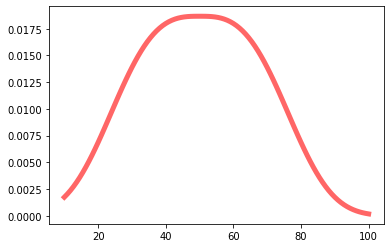

In [15]:
fig, ax = plt.subplots(1, 1)

x = np.linspace(10, 100, 100)

ax.plot(x, gennorm.pdf(x, 3, 50, 30),

       'r-', lw=5, alpha=0.6, label='gennorm pdf')

Code propre

In [16]:
from PIL import Image,ImageDraw
import random
import numpy as np
from scipy.stats import gennorm

def draw_shapes(draw, color, law, size, limits_x, limits_y, nb_samples, mean=None, std=None, beta=None):
    positions_x = []
    positions_y = []  
    if law.lower()=="uniform":
        positions_x = np.random.uniform(limits_x[0], limits_x[1]-size[0], nb_samples)
        positions_y = np.random.uniform(limits_y[0], limits_y[1]-size[1], nb_samples)
        
    elif law.lower()=="gennorm":      
        for i in range(nb_samples):
            position_x = gennorm.rvs(beta, loc=mean,scale=std, size=1, random_state=None)
            while(position_x > (limits_x[1]-size[0]) or position_x < limits_x[0]):
                position_x = gennorm.rvs(beta, loc=mean,scale=std, size=1, random_state=None)
            positions_x.append(position_x)
            position_y = gennorm.rvs(beta, loc=mean,scale=std, size=1, random_state=None)
            while(position_y > (limits_y[1]-size[1]) or position_y < limits_y[0]):
                position_y = gennorm.rvs(beta, loc=mean,scale=std, size=1, random_state=None)
            positions_y.append(position_y)
        
    else:
        print("Invalid law")
        exit()
        
    for i in range(nb_samples):            
        draw.rectangle([(positions_x[i], positions_y[i]), (positions_x[i] + size[0], positions_y[i] + size[1])], fill=color)
    return positions_x, positions_y



def create_figure(width, height):
    im = Image.new('RGB', (width, height))
    draw = ImageDraw.Draw(im)
    return im, draw
        

In [17]:
width, height = 1000,1000
im, draw = create_figure(width, width)

In [18]:
size_tissue = [np.random.uniform(80,95)/100 * width, np.random.uniform(80,95)/100 * height]

positions_x, positions_y = draw_shapes(draw, "purple", "uniform", size_tissue, [0.05*width, 0.95 * width], [0.05*height, 0.95 * height], 1)

In [19]:
size = [np.random.uniform(1,5)/100 * width, np.random.uniform(1,5)/100 * height]

In [20]:
draw_shapes(draw, "green", "gennorm", size, [positions_x[0], positions_x[0] + size_tissue[0]], [positions_y[0], positions_y[0] + size_tissue[1]], 100, 500, 200, 10)

([array([411.71498115]),
  array([478.26865109]),
  array([457.4041202]),
  array([288.83367466]),
  array([542.70055217]),
  array([529.16959485]),
  array([689.01504695]),
  array([553.25533531]),
  array([521.09180046]),
  array([649.88281584]),
  array([544.13694688]),
  array([323.64451407]),
  array([322.81280675]),
  array([595.09206674]),
  array([615.61702489]),
  array([662.50477564]),
  array([610.14577303]),
  array([381.73427787]),
  array([378.03983938]),
  array([517.30840815]),
  array([502.62098339]),
  array([366.43015914]),
  array([300.57687479]),
  array([547.14241219]),
  array([479.97949936]),
  array([482.38482917]),
  array([489.10594216]),
  array([409.41685646]),
  array([630.33048146]),
  array([579.22654053]),
  array([512.38845389]),
  array([297.12230611]),
  array([510.99377024]),
  array([584.65019997]),
  array([555.67201876]),
  array([543.07673683]),
  array([421.86344976]),
  array([374.27271093]),
  array([291.49484786]),
  array([339.63041148]),
 

In [21]:
im.show()

In [22]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d

rng = np.random.default_rng()

points = rng.random((30, 2))   # 30 random points in 2-D

hull = ConvexHull(points)

print(points)
print(hull.simplices)

[[0.26823969 0.76297745]
 [0.52576891 0.78355303]
 [0.45768328 0.27932981]
 [0.13554044 0.44126104]
 [0.32406956 0.39657831]
 [0.69413758 0.84945077]
 [0.25631805 0.32386627]
 [0.23732891 0.60125321]
 [0.72989869 0.68510148]
 [0.31096648 0.77042012]
 [0.0241068  0.20870042]
 [0.81143437 0.4540091 ]
 [0.25411337 0.32062471]
 [0.13162481 0.23794408]
 [0.72309975 0.16704013]
 [0.13066195 0.2891953 ]
 [0.21400823 0.11210987]
 [0.28929083 0.7333854 ]
 [0.25212027 0.67844602]
 [0.41879252 0.21617461]
 [0.39594536 0.74801669]
 [0.47899929 0.04131691]
 [0.77166454 0.28943116]
 [0.12609257 0.58516972]
 [0.11592036 0.20379125]
 [0.47493106 0.99149192]
 [0.70904566 0.9774425 ]
 [0.05899764 0.024672  ]
 [0.93893089 0.77621135]
 [0.32850503 0.53523951]]
[[23 10]
 [26 28]
 [26 25]
 [27 10]
 [22 28]
 [22 14]
 [ 0 25]
 [ 0 23]
 [21 14]
 [21 27]]


[23 10]


[26 28]


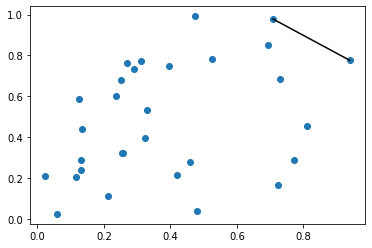

[26 25]


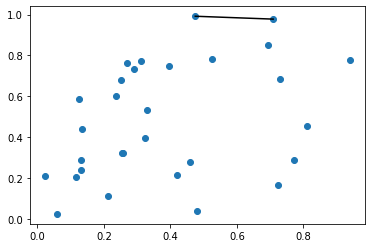

[27 10]


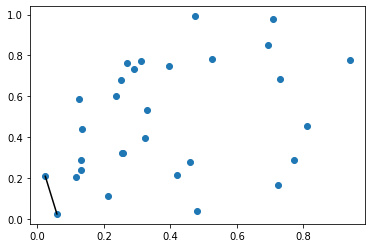

[22 28]


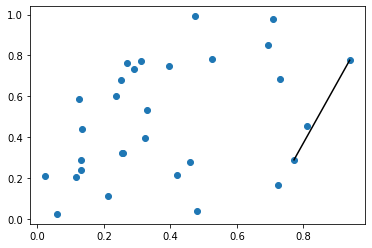

[22 14]


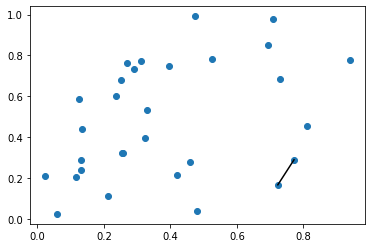

[ 0 25]


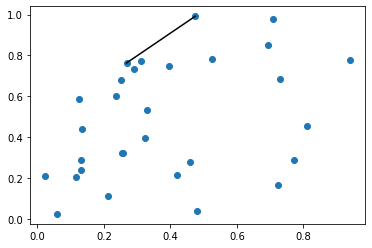

[ 0 23]


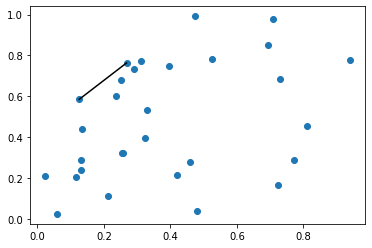

[21 14]


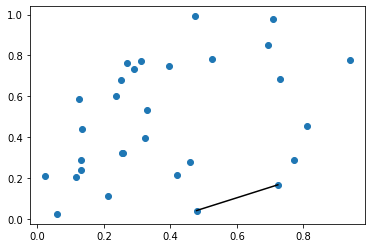

[21 27]


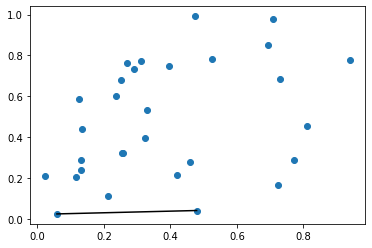

In [23]:
plt.plot(points[:,0], points[:,1], 'o')

for simplex in hull.simplices:
    plt.plot(points[:,0], points[:,1], 'o')

    print(simplex)
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
    plt.show()


In [24]:
hull.neighbors

array([[3, 7],
       [4, 2],
       [6, 1],
       [0, 9],
       [1, 5],
       [8, 4],
       [2, 7],
       [0, 6],
       [5, 9],
       [3, 8]], dtype=int32)

In [25]:
generators = np.array([[10, 2],

                       [0.2, 0.4],

                       [0.4, 0.4],

                       [0.4, 0.2],

                       [0.3, 0.6]])

In [26]:
hull = ConvexHull(points=generators)

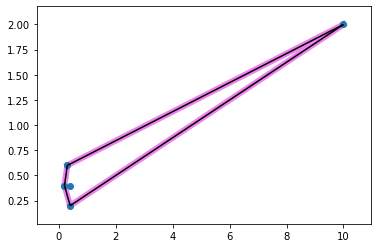

In [27]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1)

for visible_facet in hull.simplices:

    ax.plot(hull.points[visible_facet, 0],

            hull.points[visible_facet, 1],

            color='violet',

            lw=6)

convex_hull_plot_2d(hull, ax=ax)


plt.show()

In [28]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
               [4, 2], [4, 4], [4, 0]])
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=10).fit(X)
clustering.labels_


array([0, 0, 0, 0, 0, 0])

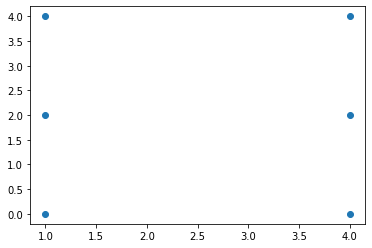

In [29]:
plt.plot(X[:,0], X[:,1], 'o')

In [30]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [31]:
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(clustering, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [32]:
X = np.array([[1, 2], [1, 4], [1, 0],
               [4, 2], [4, 4], [4, 0]])
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=10).fit(X)
clustering.labels_


array([0, 0, 0, 0, 0, 0])

In [33]:
import random

coords = np.array([(random.random()*10000, random.random()*10000) for _ in range(10000)])

In [34]:
clustering = AgglomerativeClustering(n_clusters=3).fit(coords)
#clustering.labels_


In [35]:

fig = plt.figure()
ax = fig.add_subplot(111)
# plot x,y data with c as the color vector, set the line width of the markers to 0
ax.scatter(coords[:,0], coords[:,1], c=clustering.labels_, lw=0)

In [36]:
print(coords[0,:].shape)
print(coords[:,0])
print(coords)

(2,)
[ 941.63233254 1422.35399752 3478.96381657 ... 3266.14209266 7615.91086261
 8565.43777363]
[[ 941.63233254 4282.70853469]
 [1422.35399752 5340.96917481]
 [3478.96381657  893.84159182]
 ...
 [3266.14209266  442.75875877]
 [7615.91086261 1623.9331067 ]
 [8565.43777363 9070.08995074]]


AttributeError: 'AgglomerativeClustering' object has no attribute 'distances_'

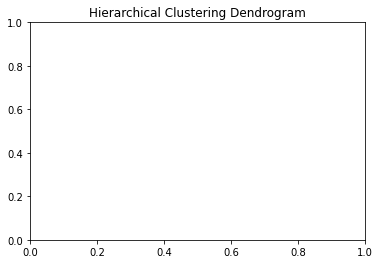

In [37]:
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(clustering, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [38]:
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(coords)
clustering.labels_

array([9022, 7475, 8238, ...,    3,    1,    0])

In [39]:
from scipy.cluster import hierarchy
Z = hierarchy.linkage(coords, 'complete')
Z

array([[1.71400000e+03, 2.85900000e+03, 4.37552933e-01, 2.00000000e+00],
       [4.37500000e+03, 9.47200000e+03, 9.63743704e-01, 2.00000000e+00],
       [1.57300000e+03, 9.73400000e+03, 1.72907433e+00, 2.00000000e+00],
       ...,
       [1.99900000e+04, 1.99930000e+04, 1.08142826e+04, 4.17300000e+03],
       [1.99940000e+04, 1.99950000e+04, 1.13902208e+04, 5.82700000e+03],
       [1.99960000e+04, 1.99970000e+04, 1.40010706e+04, 1.00000000e+04]])

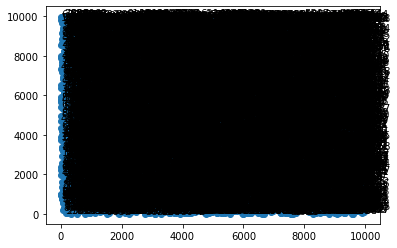

In [40]:
import matplotlib.pyplot as plt
y = coords[:,0]
z = coords[:,1]
n = range(len(coords))

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))
    
    


[5.0, 5.0, 15.0, 15.0]


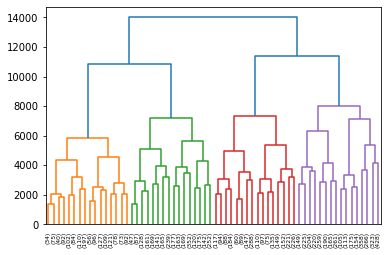

In [41]:
plt.figure()

dn = hierarchy.dendrogram(Z, p=5,truncate_mode="level", get_leaves=True)

print(dn['icoord'][0])

In [42]:
dct = dict([(i, {i}) for i in range(coords.shape[0])])
#print(list(dct.values()))
for i, row in enumerate(Z, coords.shape[0]):
    dct[i] = dct[row[0]].union(dct[row[1]])
    del dct[row[0]]
    del dct[row[1]]
    #print(list(dct.values()))

In [43]:
import random

coords = np.array([(random.random()*1000, random.random()*1000) for _ in range(1000)])

In [44]:
from scipy.cluster import hierarchy
Z = hierarchy.linkage(coords, 'single')
Z

array([[8.24000000e+02, 9.70000000e+02, 3.15887208e-01, 2.00000000e+00],
       [5.28000000e+02, 7.34000000e+02, 8.47494030e-01, 2.00000000e+00],
       [5.09000000e+02, 6.31000000e+02, 9.76942362e-01, 2.00000000e+00],
       ...,
       [1.88900000e+03, 1.99500000e+03, 5.20050697e+01, 9.98000000e+02],
       [7.60000000e+01, 1.99600000e+03, 5.31114525e+01, 9.99000000e+02],
       [2.12000000e+02, 1.99700000e+03, 5.88930231e+01, 1.00000000e+03]])

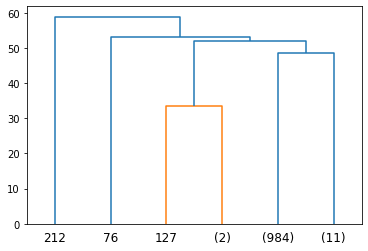

In [45]:
plt.figure()

dn = hierarchy.dendrogram(Z, p=3,truncate_mode="level", get_leaves=True)

In [46]:
dico = {}


print(Z.shape[0])
for i, row in enumerate(Z[:,:2], coords.shape[0]):
    print(row, i)
    print(row)
    dico[str(i)] = row
print(len(dico))   

999
[824. 970.] 1000
[824. 970.]
[528. 734.] 1001
[528. 734.]
[509. 631.] 1002
[509. 631.]
[751. 827.] 1003
[751. 827.]
[833. 930.] 1004
[833. 930.]
[254. 284.] 1005
[254. 284.]
[380. 457.] 1006
[380. 457.]
[ 43. 719.] 1007
[ 43. 719.]
[478. 727.] 1008
[478. 727.]
[602. 733.] 1009
[602. 733.]
[ 69. 557.] 1010
[ 69. 557.]
[574. 755.] 1011
[574. 755.]
[585. 645.] 1012
[585. 645.]
[253. 812.] 1013
[253. 812.]
[355. 381.] 1014
[355. 381.]
[ 27. 740.] 1015
[ 27. 740.]
[375. 490.] 1016
[375. 490.]
[ 81. 979.] 1017
[ 81. 979.]
[ 410. 1009.] 1018
[ 410. 1009.]
[257. 764.] 1019
[257. 764.]
[462. 659.] 1020
[462. 659.]
[591. 621.] 1021
[591. 621.]
[348. 654.] 1022
[348. 654.]
[ 98. 444.] 1023
[ 98. 444.]
[464. 878.] 1024
[464. 878.]
[610. 763.] 1025
[610. 763.]
[ 430. 1016.] 1026
[ 430. 1016.]
[407. 422.] 1027
[407. 422.]
[ 87. 770.] 1028
[ 87. 770.]
[ 46. 515.] 1029
[ 46. 515.]
[735. 901.] 1030
[735. 901.]
[541. 946.] 1031
[541. 946.]
[129. 532.] 1032
[129. 532.]
[179. 520.] 1033
[179. 520.]
[ 

[ 743. 1189.] 1942
[ 743. 1189.]
[1886. 1937.] 1943
[1886. 1937.]
[ 116. 1939.] 1944
[ 116. 1939.]
[1942. 1944.] 1945
[1942. 1944.]
[1398. 1945.] 1946
[1398. 1945.]
[1836. 1943.] 1947
[1836. 1943.]
[1946. 1947.] 1948
[1946. 1947.]
[1918. 1936.] 1949
[1918. 1936.]
[1902. 1938.] 1950
[1902. 1938.]
[1901. 1948.] 1951
[1901. 1948.]
[1710. 1941.] 1952
[1710. 1941.]
[ 967. 1951.] 1953
[ 967. 1951.]
[1796. 1930.] 1954
[1796. 1930.]
[1866. 1953.] 1955
[1866. 1953.]
[1653. 1872.] 1956
[1653. 1872.]
[1903. 1955.] 1957
[1903. 1955.]
[1758. 1940.] 1958
[1758. 1940.]
[1892. 1958.] 1959
[1892. 1958.]
[1950. 1957.] 1960
[1950. 1957.]
[ 583. 1956.] 1961
[ 583. 1956.]
[1923. 1960.] 1962
[1923. 1960.]
[1959. 1962.] 1963
[1959. 1962.]
[1597. 1963.] 1964
[1597. 1963.]
[1733. 1868.] 1965
[1733. 1868.]
[1682. 1964.] 1966
[1682. 1964.]
[ 103. 1966.] 1967
[ 103. 1966.]
[ 503. 1967.] 1968
[ 503. 1967.]
[ 421. 1949.] 1969
[ 421. 1949.]
[1968. 1969.] 1970
[1968. 1969.]
[ 181. 1970.] 1971
[ 181. 1970.]
[ 779. 197

In [47]:
keys = sorted(dico.keys(), reverse=True)

In [48]:
from collections import deque

class Node:
    def __init__(self, data, level):
        self.left = None
        self.right = None
        self.data = data
        self.level = level
    def display(self):
        lines, *_ = self._display_aux()
        for line in lines:
            print(line)
    def _display_aux(self):
        """Returns list of strings, width, height, and horizontal coordinate of the root."""
        # No child.
        if self.right is None and self.left is None:
            line = '%s' % self.data
            width = len(line)
            height = 1
            middle = width // 2
            return [line], width, height, middle

        # Only left child.
        if self.right is None:
            lines, n, p, x = self.left._display_aux()
            s = '%s' % self.data
            u = len(s)
            first_line = (x + 1) * ' ' + (n - x - 1) * '_' + s
            second_line = x * ' ' + '/' + (n - x - 1 + u) * ' '
            shifted_lines = [line + u * ' ' for line in lines]
            return [first_line, second_line] + shifted_lines, n + u, p + 2, n + u // 2

        # Only right child.
        if self.left is None:
            lines, n, p, x = self.right._display_aux()
            s = '%s' % self.data
            u = len(s)
            first_line = s + x * '_' + (n - x) * ' '
            second_line = (u + x) * ' ' + '\\' + (n - x - 1) * ' '
            shifted_lines = [u * ' ' + line for line in lines]
            return [first_line, second_line] + shifted_lines, n + u, p + 2, u // 2

        # Two children.
        left, n, p, x = self.left._display_aux()
        right, m, q, y = self.right._display_aux()
        s = '%s' % self.data
        u = len(s)
        first_line = (x + 1) * ' ' + (n - x - 1) * '_' + s + y * '_' + (m - y) * ' '
        second_line = x * ' ' + '/' + (n - x - 1 + u + y) * ' ' + '\\' + (m - y - 1) * ' '
        if p < q:
            left += [n * ' '] * (q - p)
        elif q < p:
            right += [m * ' '] * (p - q)
        zipped_lines = zip(left, right)
        lines = [first_line, second_line] + [a + u * ' ' + b for a, b in zipped_lines]
        return lines, n + m + u, max(p, q) + 2, n + u // 2
     

        

    

In [52]:
 
    def add_node(self, dico):
        if str(self.data) not in dico.keys():
            return
        else :
            self.left = Node(int(dico[str(self.data)][0]), self.level + 1)
            add_node(self.left, dico)
            self.right = Node(int(dico[str(self.data)][1]),self.level + 1)
            add_node(self.right, dico)  

In [53]:
root = Node(keys[0], 0)



root.add_node(dico)
root.display()

  _1998____                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [54]:
def maxLevel(root):

        # Base case
        if (root == None):
            return 0

        # Initialize result
        result = root.level

        # Do Level order traversal keeping
        # track of number
        # of nodes at every level.
        q = deque()
        q.append(root)

        while (len(q) > 0):

            # Get the size of queue when the 
            # level order traversal for one 
            # level finishes
            count = len(q)

            # Iterate for all the nodes in
            # the queue currently
            level = 0
            while (count > 0):

                # Dequeue an node from queue
                temp = q.popleft()

                # Add this node's value to current sum.
                level = max(level,temp.level)

                # Enqueue left and right children of
                # dequeued node
                if (temp.left != None):
                    q.append(temp.left)
                if (temp.right != None):
                    q.append(temp.right)

                count -= 1    

            # Update the maximum node count value
            result = max(level, result)

        return result


In [55]:
maxLevel(root)

73

In [56]:
def levelTraversal(root, level, listOfLists):
    if root is None:
        return

    if level >= len(listOfLists):
        liste = []
        listOfLists.append(liste)
    listOfLists[level].append(root)
    levelTraversal(root.left, level+1, listOfLists)
    levelTraversal(root.right, level+1, listOfLists)


In [57]:
listOfLists = []
levelTraversal(root, 0, listOfLists)

In [58]:
listOfLists

[[<__main__.Node at 0x7f18f783a0d0>],
 [<__main__.Node at 0x7f18f783aa30>, <__main__.Node at 0x7f18f782a7f0>],
 [<__main__.Node at 0x7f18f782a430>, <__main__.Node at 0x7f18f782ac70>],
 [<__main__.Node at 0x7f18f782a1f0>, <__main__.Node at 0x7f18f782ad30>],
 [<__main__.Node at 0x7f18f79e2eb0>, <__main__.Node at 0x7f18f79e2c70>],

In [59]:
for elt in listOfLists:
    list_node = []
    for node in elt:
        list_node.append(node.data)
    print(list_node)

['1998']
[212, 1997]
[76, 1996]
[1889, 1995]
[127, 1228, 1993, 1994]
[371, 505, 1642, 1992, 1652, 1778]
[4, 1389, 873, 1991, 401, 852, 1752, 1754]
[781, 860, 1694, 1990, 343, 1216, 23, 1599]
[282, 1692, 1799, 1989, 26, 643, 811, 1514]
[146, 671, 766, 1565, 688, 1988, 1174, 1410]
[162, 728, 1978, 1987, 18, 130, 670, 870]
[1443, 1976, 1649, 1986]
[836, 1163, 1926, 1961, 431, 1061, 1621, 1985]
[135, 785, 1431, 1893, 583, 1956, 809, 872, 1080, 1462, 562, 1984]
[791, 1327, 331, 1154, 1653, 1872, 653, 1018, 1175, 1364, 1719, 1983]
[949, 1103, 961, 1111, 508, 545, 739, 1740, 410, 1009, 626, 799, 379, 1329, 80, 549, 1895, 1982]
[373, 986, 354, 676, 572, 677, 602, 733, 954, 1146, 1438, 1739, 1848, 1981]
[423, 898, 1360, 1432, 1213, 1674, 427, 558, 102, 1980]
[9, 548, 1044, 1248, 14, 577, 167, 787, 1952, 1979]
[417, 810, 691, 822, 1710, 1941, 1099, 1977]
[207, 1573, 1466, 1933, 0, 745, 1965, 1975]
[405, 1253, 346, 385, 1701, 1927, 1733, 1868, 1788, 1974]
[256, 264, 780, 1380, 1879, 1919, 1409, 1

In [60]:
toSelect = np.random.choice(range(1,len(listOfLists)), size=2, replace=False)
toSelect = np.append(toSelect, 0)

In [61]:
toSelect = np.sort(toSelect)

In [62]:
toSelect

array([ 0, 20, 48])

In [63]:
listOfLeaves = []               
def retrieve_leaves(root, listOfLeaves):
    if root.left is None and root.right is None :
        listOfLeaves.append(root.data)
        return
    else:
        retrieve_leaves(root.left, listOfLeaves)
        retrieve_leaves(root.right, listOfLeaves)


In [64]:
listOfLeaves = []

In [65]:
listOfLeaves = [[] for j in range(len(toSelect))]

print(listOfLeaves)
for i,level in enumerate(toSelect):
    print(level)
    listOfLeaves[i] = [[] for j in range(len(listOfLists[level]))]
    for j, elt in enumerate(listOfLists[level]):
        retrieve_leaves(elt, listOfLeaves[i][j])        
    print(listOfLeaves)

[[], [], []]
0
[[[212, 76, 127, 371, 505, 4, 781, 860, 873, 282, 146, 671, 766, 162, 728, 688, 836, 135, 785, 791, 949, 373, 986, 331, 961, 354, 676, 583, 508, 545, 739, 572, 677, 431, 809, 872, 653, 410, 602, 733, 626, 799, 379, 954, 423, 898, 562, 80, 549, 9, 548, 417, 810, 691, 822, 14, 577, 167, 787, 427, 558, 102, 207, 405, 256, 264, 346, 385, 780, 850, 330, 891, 437, 171, 821, 303, 409, 814, 565, 599, 833, 930, 376, 163, 977, 943, 311, 844, 454, 683, 222, 965, 479, 433, 463, 665, 884, 301, 333, 842, 975, 335, 389, 585, 645, 98, 444, 601, 166, 876, 305, 72, 721, 771, 148, 59, 593, 725, 947, 177, 905, 469, 310, 700, 466, 759, 796, 922, 114, 472, 731, 896, 31, 613, 798, 910, 368, 952, 647, 705, 164, 542, 262, 289, 300, 940, 0, 745, 386, 840, 618, 744, 267, 501, 862, 51, 611, 88, 909, 552, 488, 175, 266, 623, 225, 660, 507, 398, 866, 779, 181, 503, 103, 380, 457, 10, 997, 694, 591, 621, 227, 288, 880, 244, 268, 892, 587, 106, 658, 214, 868, 391, 30, 279, 964, 679, 936, 994, 830, 203,

In [66]:
coords

array([[811.79501783, 642.42446343],
       [311.58662387,  39.35009294],
       [270.56215351, 305.55365135],
       ...,
       [441.15926822,  23.51556552],
       [956.22333839, 202.94069047],
       [168.8027446 , 568.34428691]])

In [67]:
def map_node_coords(indexes, coords):
    corresp_coords = []
    for i in range(len(indexes)):
        corresp_coords.append(coords[indexes[i]])
    return corresp_coords

In [68]:
liste = [6, 7, 4, 0, 8]
liste1 = [9, 1, 3, 5]
to_plot = []
to_plot_1 = []
for elt in liste:
    to_plot.append(coords[elt].tolist())
for elt in liste1:
    to_plot_1.append(coords[elt].tolist())

print(to_plot)

[[796.6331979681319, 828.4981020227646], [361.9274451249345, 143.1319808279714], [737.0772836503556, 412.6578208149176], [811.7950178323223, 642.4244634327267], [297.20901715093373, 307.55258578319246]]


[array([  3.42093512, 124.4148526 ]), array([910.43672755, 999.02407511]), array([597.03756668, 990.89943557]), array([629.56473777, 980.21338863]), array([630.58162142, 992.40759811]), array([737.07728365, 412.65782081]), array([748.35776245, 391.20545099]), array([731.466424  , 388.28458896]), array([ 59.59959025, 106.58196874]), array([829.88470853, 722.52560259]), array([861.93918056, 750.04230534]), array([836.31295069, 747.71701287]), array([865.93009479, 901.37314857]), array([827.34929669, 902.49503123]), array([841.99690082, 918.63348447]), array([341.41536332, 994.25289719]), array([846.83008666, 982.40149546]), array([857.37616341, 967.02702327]), array([867.62408029, 966.219195  ]), array([987.28537892, 816.62297723]), array([990.71852984, 798.67523276]), array([989.87602126, 783.5016151 ]), array([997.85919776, 783.20291178]), array([930.95699207, 858.06937201]), array([972.47752952, 849.12402664]), array([973.12765486, 859.0101055 ]), array([964.72831407, 858.43478005]), 

NameError: name 'plot_hull' is not defined

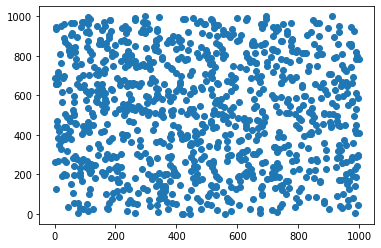

In [69]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1)

colors = ['blue', 'green', 'purple', 'yellow', 'red', 'black', 'brown', 'cyan', 'orange']

for i in range(len(listOfLeaves)):
    color = colors[i]
    for elt in listOfLeaves[i]:
        to_plot = map_node_coords(elt, coords)
        print(to_plot)
        ax.plot([X[0] for X in to_plot], [X[1] for X in to_plot], 'o', zorder=10)
        if len(to_plot) > 2 :
            hull = ConvexHull(points=to_plot)
            plot_hull(hull, ax, color, i)
            
plt.show() 

In [70]:
test = [x[0] for x in to_plot]
print(test)

[3.4209351164911084, 910.4367275451552, 597.0375666788291, 629.5647377740474, 630.5816214182661, 737.0772836503556, 748.3577624534754, 731.4664239987735, 59.59959024682715, 829.8847085318992, 861.9391805603234, 836.3129506877956, 865.9300947860604, 827.3492966893929, 841.9969008223052, 341.41536331783516, 846.8300866604401, 857.3761634055036, 867.6240802921695, 987.285378916653, 990.7185298384198, 989.8760212645882, 997.8591977613297, 930.9569920727579, 972.4775295172788, 973.1276548602652, 964.7283140730796, 897.7745637037971, 982.424750601893, 972.3628863461053, 934.5602435676926, 916.7724167790947, 931.9206319361094, 941.9032073882987, 922.7880617856002, 918.0231831254295, 10.723787205695668, 7.744673037387795, 3.5129083326908006, 4.750402215849214, 28.769490062130142, 32.22526794017489, 10.617514133325457, 10.962313438575787, 9.726852673776376, 0.10059386403649118, 21.56854827229282, 807.4759574075448, 830.0857062543095, 751.2182207352761, 764.3326111720825, 720.6964512528903, 724.

In [71]:
hull = ConvexHull(points=to_plot)
hull1 = ConvexHull(points=to_plot_1)
print(hull.points[hull.vertices, :])

[[3.42093512e+00 1.24414853e+02]
 [4.38844833e+01 3.68524059e+01]
 [7.72048114e+01 7.77010050e+00]
 [2.62404355e+02 2.91096188e+00]
 [4.18919137e+02 6.39372966e-01]
 [5.60734967e+02 9.24542041e-01]
 [9.84053391e+02 7.01157694e+00]
 [9.96928639e+02 4.50571390e+01]
 [9.98418804e+02 4.08094837e+02]
 [9.97859198e+02 7.83202912e+02]
 [9.82424751e+02 9.24851808e+02]
 [9.72362886e+02 9.47359909e+02]
 [9.10436728e+02 9.99024075e+02]
 [6.94287599e+02 9.99544110e+02]
 [2.97290164e+02 9.99168364e+02]
 [1.10606782e+02 9.95781604e+02]
 [3.15955752e+01 9.61968014e+02]
 [3.78498551e+00 9.45987405e+02]
 [3.31194890e+00 9.33562343e+02]
 [1.00593864e-01 6.87065796e+02]
 [2.41665161e+00 2.61565639e+02]]


In [72]:
def plot_hull(hull, ax, color, i):
    for visible_facet in hull.simplices:

        ax.plot(hull.points[visible_facet, 0],

                hull.points[visible_facet, 1],

                color=color,

                lw=4)
    ax.fill(hull.points[hull.vertices, 0], hull.points[hull.vertices, 1], color=color, zorder=i, alpha=1)
        

In [73]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1)

for visible_facet in hull.simplices:

    ax.plot(hull.points[visible_facet, 0],

            hull.points[visible_facet, 1],

            color='violet',

            lw=2)
    plt.fill(hull.points[hull.vertices, 0], hull.points[hull.vertices, 1], color='violet', alpha=0.3)
    
'''    
for visible_facet in hull1.simplices:

    ax.plot(hull1.points[visible_facet, 0],

            hull1.points[visible_facet, 1],

            color='red',

            lw=2)

'''
plot_hull(hull1, ax, 'red', 10)


plt.show()


In [74]:
import cv2

ModuleNotFoundError: No module named 'cv2'

In [75]:
convex_hull_image(np.array(to_plot))

NameError: name 'convex_hull_image' is not defined

In [76]:
img = Image.new('L', (10000,10000), 0)

In [93]:
from PIL import ImageOps

def plot_hull_pillow(hull, img, i, to_plot):
    verts = [(to_plot[v,0], to_plot[v,1]) for v in hull.vertices]
    #print(verts)
    ImageDraw.Draw(img).polygon(verts, outline=10, fill=100+30*i)
    #print(np.array(img))
 

In [34]:
plot_hull_pillow(hull, img, 0, np.array(to_plot))

NameError: name 'to_plot' is not defined

In [79]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1)
ax.plot([X[0] for X in to_plot], [X[1] for X in to_plot], 'o', zorder=10)

plot_hull(hull, ax, 'red', 0)

plt.show()

print(to_plot)

[array([  3.42093512, 124.4148526 ]), array([910.43672755, 999.02407511]), array([597.03756668, 990.89943557]), array([629.56473777, 980.21338863]), array([630.58162142, 992.40759811]), array([737.07728365, 412.65782081]), array([748.35776245, 391.20545099]), array([731.466424  , 388.28458896]), array([ 59.59959025, 106.58196874]), array([829.88470853, 722.52560259]), array([861.93918056, 750.04230534]), array([836.31295069, 747.71701287]), array([865.93009479, 901.37314857]), array([827.34929669, 902.49503123]), array([841.99690082, 918.63348447]), array([341.41536332, 994.25289719]), array([846.83008666, 982.40149546]), array([857.37616341, 967.02702327]), array([867.62408029, 966.219195  ]), array([987.28537892, 816.62297723]), array([990.71852984, 798.67523276]), array([989.87602126, 783.5016151 ]), array([997.85919776, 783.20291178]), array([930.95699207, 858.06937201]), array([972.47752952, 849.12402664]), array([973.12765486, 859.0101055 ]), array([964.72831407, 858.43478005]), 

In [80]:
img = Image.new('L', (1000,10000), 0)

colors = ['blue', 'green', 'purple', 'yellow', 'red', 'black', 'brown', 'cyan', 'orange']

for i in range(len(listOfLeaves)):
    color = colors[i]
    for elt in listOfLeaves[i]:
        to_plot = map_node_coords(elt, coords)
        #print(to_plot)
        #ImageDraw.Draw(img).point([(X[0], X[1]) for X in to_plot], fill=255)
        if len(to_plot) > 2 :
            hull = ConvexHull(points=to_plot, qhull_options='Qt')
            plot_hull_pillow(hull, img, i, np.array(to_plot))   
            
for elt in listOfLeaves[0]:
    to_plot = map_node_coords(elt, coords)
    ImageDraw.Draw(img).point([(X[0], X[1]) for X in to_plot], fill=255)
    

In [81]:
img.show()

In [82]:
img = Image.new('L', (1000,10000), 0)

colors = ['blue', 'green', 'purple', 'yellow', 'red', 'black', 'brown', 'cyan', 'orange']

'''
for i in range(len(listOfLeaves)):
    color = colors[i]
    for elt in listOfLeaves[i]:
        to_plot = map_node_coords(elt, coords)
        #print(to_plot)
        #ImageDraw.Draw(img).point([(X[0], X[1]) for X in to_plot], fill=255)
        if len(to_plot) > 2 :
            hull = ConvexHull(points=to_plot, qhull_options='Qt')
            plot_hull_pillow(hull, img, i, np.array(to_plot))   
'''            
for elt in listOfLeaves[0]:
    to_plot = map_node_coords(elt, coords)
    ImageDraw.Draw(img).point([(X[0], X[1]) for X in to_plot], fill=255)

In [83]:
img.show()

In [84]:
from PIL import ImageShow

ImageShow._viewers

In [85]:
#taken from https://stackoverflow.com/questions/2824478/shortest-distance-between-two-line-segments

import numpy as np

def closestDistanceBetweenLines(a0,a1,b0,b1,clampAll=False,clampA0=False,clampA1=False,clampB0=False,clampB1=False):

    ''' Given two lines defined by numpy.array pairs (a0,a1,b0,b1)
        Return the closest points on each segment and their distance
    '''

    # If clampAll=True, set all clamps to True
    if clampAll:
        clampA0=True
        clampA1=True
        clampB0=True
        clampB1=True


    # Calculate denomitator
    
    
    A = a1 - a0
    B = b1 - b0
    magA = np.linalg.norm(A)
    magB = np.linalg.norm(B)
    _A = A / magA
    _B = B / magB

    cross = np.cross(_A, _B);
    denom = np.linalg.norm(cross)**2
    
    
    # If lines are parallel (denom=0) test if lines overlap.
    # If they don't overlap then there is a closest point solution.
    # If they do overlap, there are infinite closest positions, but there is a closest distance
    if not denom:
        d0 = np.dot(_A,(b0-a0))
        
        # Overlap only possible with clamping
        if clampA0 or clampA1 or clampB0 or clampB1:
            d1 = np.dot(_A,(b1-a0))
            
            # Is segment B before A?
            if d0 <= 0 >= d1:
                if clampA0 and clampB1:
                    if np.absolute(d0) < np.absolute(d1):
                        return a0,b0,np.linalg.norm(a0-b0)
                    return a0,b1,np.linalg.norm(a0-b1)
                
                
            # Is segment B after A?
            elif d0 >= magA <= d1:
                if clampA1 and clampB0:
                    if np.absolute(d0) < np.absolute(d1):
                        return a1,b0,np.linalg.norm(a1-b0)
                    return a1,b1,np.linalg.norm(a1-b1)
                
                
        # Segments overlap, return distance between parallel segments
        return None,None,np.linalg.norm(((d0*_A)+a0)-b0)
        
    
    
    # Lines criss-cross: Calculate the projected closest points
    t = (b0 - a0);
    
    print(_B, cross)
    detA = np.linalg.det([t, _B, cross])
    detB = np.linalg.det([t, _A, cross])

    t0 = detA/denom;
    t1 = detB/denom;

    pA = a0 + (_A * t0) # Projected closest point on segment A
    pB = b0 + (_B * t1) # Projected closest point on segment B


    # Clamp projections
    if clampA0 or clampA1 or clampB0 or clampB1:
        if clampA0 and t0 < 0:
            pA = a0
        elif clampA1 and t0 > magA:
            pA = a1
        
        if clampB0 and t1 < 0:
            pB = b0
        elif clampB1 and t1 > magB:

            pB = b1
            
        # Clamp projection A
        if (clampA0 and t0 < 0) or (clampA1 and t0 > magA):
            dot = np.dot(_B,(pA-b0))
            if clampB0 and dot < 0:
                dot = 0
            elif clampB1 and dot > magB:
                dot = magB
            pB = b0 + (_B * dot)
    
        # Clamp projection B
        if (clampB0 and t1 < 0) or (clampB1 and t1 > magB):
            dot = np.dot(_A,(pB-a0))
            if clampA0 and dot < 0:
                dot = 0
            elif clampA1 and dot > magA:
                dot = magA
            pA = a0 + (_A * dot)

    
    return pA,pB,np.linalg.norm(pA-pB)

In [86]:
a1=np.array([13.43, 21.7])
a0=np.array([27.83, 31.74])
b0=np.array([77.54, 7.53])
b1=np.array([26.99, 12.39])

closestDistanceBetweenLines(a0,a1,b0,b1,clampAll=True)

[-0.99541011  0.09570115] -0.6478107172177218


/home/mariereinbigler/miniconda3/envs/plots/lib/python3.8/site-packages/numpy/linalg/linalg.py:2153: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a = asarray(a)


LinAlgError: 1-dimensional array given. Array must be at least two-dimensional

In [87]:
points = np.array([(1,1), (1,2), (2,1), (2,2)])

In [88]:
hull = ConvexHull(points=points)


In [89]:
findSmallestDistanceBetweenSegmentAndPolygon(np.array([3,1]), np.array([3,2]), hull.points[hull.vertices])

NameError: name 'findSmallestDistanceBetweenSegmentAndPolygon' is not defined

In [454]:
def segments_distance(x11, y11, x12, y12, x21, y21, x22, y22):
    """ distance between two segments in the plane:
        one segment is (x11, y11) to (x12, y12)
        the other is   (x21, y21) to (x22, y22)
    """
    if segments_intersect(x11, y11, x12, y12, x21, y21, x22, y22): return 0
    # try each of the 4 vertices w/the other segment
    distances = []
    distances.append(point_segment_distance(x11, y11, x21, y21, x22, y22))
    distances.append(point_segment_distance(x12, y12, x21, y21, x22, y22))
    distances.append(point_segment_distance(x21, y21, x11, y11, x12, y12))
    distances.append(point_segment_distance(x22, y22, x11, y11, x12, y12))
    return min(distances)

def segments_intersect(x11, y11, x12, y12, x21, y21, x22, y22):
    """ whether two segments in the plane intersect:
        one segment is (x11, y11) to (x12, y12)
        the other is   (x21, y21) to (x22, y22)
    """
    dx1 = x12 - x11
    dy1 = y12 - y11
    dx2 = x22 - x21
    dy2 = y22 - y21
    delta = dx2 * dy1 - dy2 * dx1
    if delta == 0: return False  # parallel segments
    s = (dx1 * (y21 - y11) + dy1 * (x11 - x21)) / delta
    t = (dx2 * (y11 - y21) + dy2 * (x21 - x11)) / (-delta)
    return (0 <= s <= 1) and (0 <= t <= 1)

import math
def point_segment_distance(px, py, x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    if dx == dy == 0:  # the segment's just a point
        return math.hypot(px - x1, py - y1)

  # Calculate the t that minimizes the distance.
    t = ((px - x1) * dx + (py - y1) * dy) / (dx * dx + dy * dy)

  # See if this represents one of the segment's
  # end points or a point in the middle.
    if t < 0:
        dx = px - x1
        dy = py - y1
    elif t > 1:
        dx = px - x2
        dy = py - y2
    else:
        near_x = x1 + t * dx
        near_y = y1 + t * dy
        dx = px - near_x
        dy = py - near_y

    return math.hypot(dx, dy)

In [455]:
hull.points[hull.vertices]

array([[1.59354913e+00, 9.46635871e+02],
       [1.36991086e-01, 7.71685017e+02],
       [6.68445538e-01, 6.98937171e+02],
       [1.74034525e+00, 6.57934533e+02],
       [5.78890909e+00, 5.75944747e+02],
       [1.66614054e+01, 5.38461268e+02],
       [5.61245935e+01, 5.02887725e+02],
       [9.01867568e+01, 4.72871669e+02],
       [1.30197605e+02, 4.41006243e+02],
       [2.16098842e+02, 3.88547313e+02],
       [2.95760026e+02, 3.60332736e+02],
       [3.53613835e+02, 3.53262737e+02],
       [3.56826469e+02, 3.52981138e+02],
       [4.44067863e+02, 3.48935790e+02],
       [5.43488082e+02, 3.64930592e+02],
       [5.61948159e+02, 3.69373020e+02],
       [6.23717214e+02, 3.96474835e+02],
       [6.55891993e+02, 4.11616370e+02],
       [6.71457568e+02, 4.20183452e+02],
       [7.05587177e+02, 4.46869828e+02],
       [7.28228420e+02, 4.65045752e+02],
       [8.06131447e+02, 5.40173381e+02],
       [8.14397769e+02, 5.52047301e+02],
       [8.21382876e+02, 5.62539956e+02],
       [8.522849

In [456]:
points1 = np.array([(3,1), (3,2), (2,1), (2,2)])
hull1 = ConvexHull(points=points1)

In [457]:
def findSmallestDistanceBetweenPointAndPolygon(x,y, poly_vertices):
    min_dist = float('inf')
    for i in range(len(poly_vertices)):
        if i == len(poly_vertices) -1:
            val = point_segment_distance(x, y, poly_vertices[i][0], poly_vertices[i][1], poly_vertices[0][0], poly_vertices[0][1]) #(px, py, x1, y1, x2, y2)
        else : 
            val = point_segment_distance(x,y, poly_vertices[i][0], poly_vertices[i][1], poly_vertices[i+1][0], poly_vertices[i+1][1]) 
        if val < min_dist :
            min_dist=val 
    return min_dist 

In [458]:
def findSmallestDistanceBetweenSegmentAndPolygon(p1, p2, poly_vertices):
    min_dist = float('inf')
    for i in range(len(poly_vertices)):
        if i == len(poly_vertices) -1:
            val = segments_distance(p1[0], p1[1],p2[0], p2[1],poly_vertices[i][0], poly_vertices[i][1],poly_vertices[0][0], poly_vertices[0][1])
        else:
            val = segments_distance(p1[0], p1[1],p2[0], p2[1],poly_vertices[i][0], poly_vertices[i][1],poly_vertices[i+1][0], poly_vertices[i+1][1])
        if val < min_dist :
            min_dist=val
    return min_dist        
    

In [459]:
findSmallestDistanceBetweenPointAndPolygon(1,1, hull.points[hull.vertices])

443.238572007131

In [460]:
findSmallestDistanceBetweenSegmentAndPolygon([3,1], [3,2], hull.points[hull.vertices])

441.3954482332654

In [461]:
def findSmallestDistanceBetweenPolygons(poly1_vertices, poly2_vertices):
    min_dist = float('inf')
    for i in range(len(poly1_vertices)):
        if i == len(poly1_vertices) -1:
            val = findSmallestDistanceBetweenSegmentAndPolygon(poly1_vertices[i], poly1_vertices[0], poly2_vertices)
        else : 
            val = findSmallestDistanceBetweenSegmentAndPolygon(poly1_vertices[i], poly1_vertices[i+1], poly2_vertices) 
        if val < min_dist :
            min_dist=val 
    for i in range(len(poly2_vertices)):
        if i == len(poly2_vertices) -1:
            val = findSmallestDistanceBetweenSegmentAndPolygon(poly2_vertices[i], poly2_vertices[0], poly1_vertices)
        else : 
            val = findSmallestDistanceBetweenSegmentAndPolygon(poly2_vertices[i], poly2_vertices[i+1], poly1_vertices) 
        if val < min_dist :
            min_dist=val 
    return min_dist

In [462]:
findSmallestDistanceBetweenPolygons(hull.points[hull.vertices], hull1.points[hull1.vertices])

441.3954482332654

In [463]:
hull.points[hull.vertices].shape

(38, 2)

In [464]:
res = np.array([1,1])

In [465]:
len(res.shape)

1

In [466]:
list_node_to_agglomerate = listOfLists[3]

NameError: name 'listOfLists' is not defined

In [467]:
import random

coords = np.array([(random.random()*1000, random.random()*1000) for _ in range(5000)])

In [468]:
coords

array([[789.2226607 , 654.6475036 ],
       [840.19552287, 663.77640155],
       [241.04400133, 334.1080248 ],
       ...,
       [769.20033222, 491.02658233],
       [817.11886219, 674.64138901],
       [581.25793122, 183.51789539]])

In [469]:
def findSmallestDistance(coords1, coords2):
    if len(coords1.shape) == 1 and len(coords2.shape) == 1:
        #print("I measure distance between two points")
        min_dist = np.sqrt((coords1[0] - coords2[0])**2 + (coords1[1] - coords2[1])**2)
    elif (len(coords1.shape) == 1 and len(coords2.shape) > 1) :
        #print("I measure distance between one point and a polygon")
        min_dist = findSmallestDistanceBetweenPointAndPolygon(coords1[0], coords1[1], coords2)
    elif (len(coords2.shape) == 1 and len(coords1.shape) > 1):
        #print("I measure distance between one point and a polygon")
        min_dist = findSmallestDistanceBetweenPointAndPolygon(coords2[0], coords2[1], coords1)
    else:
        #print("I measure distance between two polygons")
        min_dist = findSmallestDistanceBetweenPolygons(coords1, coords2)
    return min_dist

In [470]:
findSmallestDistance(hull1.points[hull.vertices], hull.points[hull.vertices])

IndexError: index 540 is out of bounds for axis 0 with size 4

In [471]:
from matplotlib.path import Path

def intersectPolygon(coords1, coords2):
    if len(coords1.shape) == 1 and len(coords2.shape) == 1:
        if coords1 == coords2:
            return True
        else: 
            return False
    
    elif (len(coords1.shape) == 1 and len(coords2.shape) > 1):
        path = Path(coords2)
        return path.contains_point(coords1)
        
    elif (len(coords2.shape) == 1 and len(coords1.shape) > 1):
        path = Path(coords1)
        return path.contains_point(coords2)
    else:
        path1 = Path(coords1)
        path2 = Path(coords2)
        return path1.intersects_path(path2, filled=True)
        

In [472]:
class Node:
    def __init__(self, coords, level):
        self.children = []
        self.parent = None
        self.coords = coords
        self.level = level

In [473]:
list_of_nodes = []

for elt in coords:
    node = Node(elt, 3)
    list_of_nodes.append(node)

In [474]:
to_group = list_of_nodes.pop(0)

In [475]:
to_group.level

3

In [476]:
to_aggl = []
parent = Node([], to_group.level - 1)
to_group.parent = parent
for i, elt in enumerate(list_of_nodes):
    if elt.level == to_group.level:
        min_dist = findSmallestDistance(to_group.coords, elt.coords)
        if min_dist < 500.0 :
            to_aggl.append(elt)
            elt.parent = parent  
            list_of_nodes.remove(elt)
parent.children.append(to_aggl)

In [477]:
to_aggl

 ...]

In [478]:
parent.children

[[<__main__.Node at 0x7f93727de400>,
  ...]]

In [479]:
def agglomerativeConvexHull(children):
    coords_aggl = []
    if len(children) > 0 :
        for i in range(len(children)):
            print("children coords")
            print(children[i].coords.tolist())
            print()
            if len(children[i].coords.tolist()) == 2:
                coords_aggl.append(children[i].coords.tolist())
            else:
                coords_aggl = coords_aggl + children[i].coords.tolist()
        print("coords_aggl")
        print(len(coords_aggl))
        print()
        return ConvexHull(points=coords_aggl)
    else:
        return None

In [480]:
hull = agglomerativeConvexHull(parent.children[0])

children coords
[840.1955228747487, 663.7764015496393]

children coords
[593.2943523792867, 511.320754382418]

children coords
[371.1087119187251, 791.6305857225841]

children coords
[600.9884847843505, 237.11486094717858]

children coords
[565.5160065224366, 665.1121356180676]

children coords
[910.7156385344883, 219.64619272898557]

children coords
[395.2987150044028, 929.5686399913484]

children coords
[550.1232957340081, 800.4653505232768]

children coords
[979.343452365555, 927.5338116969491]

children coords
[380.2202114997558, 743.4210971017977]

children coords
[420.1591665495537, 643.0542113670838]

children coords
[542.7523477816237, 635.3743106021903]

children coords
[539.5412325936154, 352.20639406039146]

children coords
[597.245555200186, 563.7748894506603]

children coords
[821.1890996862624, 918.1515571110771]

children coords
[881.2398074428553, 472.7596244669178]

children coords
[540.1372771058091, 502.06653352731814]

children coords
[682.916509017695, 405.51659003

In [481]:
hull.points[hull.vertices]

array([[761.24559609, 999.83691704],
       [560.1681782 , 999.2424311 ],
       [426.19365224, 998.31430909],
       [392.13394014, 953.26896341],
       [359.68500684, 906.23593258],
       [351.04742133, 892.34622685],
       [312.5136922 , 796.93233501],
       [303.88765293, 756.79937723],
       [294.07222798, 693.84792992],
       [293.47179832, 637.20002639],
       [298.69460689, 563.67985227],
       [304.05985491, 545.50934506],
       [335.47331581, 465.75182012],
       [361.92487417, 405.81420913],
       [379.35051388, 369.73700239],
       [410.64934146, 332.2697445 ],
       [519.33078384, 236.87434396],
       [611.54833364, 188.99601007],
       [773.90883872, 154.94439922],
       [925.29690585, 174.04196198],
       [967.37315422, 205.44107675],
       [972.80432808, 210.64812674],
       [977.43996438, 220.58244576],
       [987.10980294, 246.55378737],
       [993.1211001 , 263.89814037],
       [998.28387168, 282.19395703],
       [999.17103491, 293.49277861],
 

In [482]:
parent.coords = hull.points[hull.vertices]

In [483]:
to_group.parent.coords

array([[761.24559609, 999.83691704],
       [560.1681782 , 999.2424311 ],
       [426.19365224, 998.31430909],
       [392.13394014, 953.26896341],
       [359.68500684, 906.23593258],
       [351.04742133, 892.34622685],
       [312.5136922 , 796.93233501],
       [303.88765293, 756.79937723],
       [294.07222798, 693.84792992],
       [293.47179832, 637.20002639],
       [298.69460689, 563.67985227],
       [304.05985491, 545.50934506],
       [335.47331581, 465.75182012],
       [361.92487417, 405.81420913],
       [379.35051388, 369.73700239],
       [410.64934146, 332.2697445 ],
       [519.33078384, 236.87434396],
       [611.54833364, 188.99601007],
       [773.90883872, 154.94439922],
       [925.29690585, 174.04196198],
       [967.37315422, 205.44107675],
       [972.80432808, 210.64812674],
       [977.43996438, 220.58244576],
       [987.10980294, 246.55378737],
       [993.1211001 , 263.89814037],
       [998.28387168, 282.19395703],
       [999.17103491, 293.49277861],
 

In [484]:
list_of_nodes.append(parent)

In [485]:
#apply the agglomeration procedure to one node of rank N (creates parent node with neighbours distant from d of node)
def agglomerateOneNode(root, node, list_of_nodes, d):
    to_aggl = []
    parent = Node([], node.level - 1)
    parent.children.append(node)
    node.parent = parent
    for i, elt in enumerate(list_of_nodes):
        if elt.level == node.level:
            min_dist = findSmallestDistance(node.coords, elt.coords)
            if min_dist < d: 
                to_aggl.append(elt)
    '''
                elt.parent = parent  
                list_of_nodes.remove(elt)
                print(elt)
    '''
    if len(to_aggl) > 2 :
        parent.children = parent.children + to_aggl
        for elt in to_aggl:
            elt.parent = parent
            list_of_nodes.remove(elt)   
        hull = agglomerativeConvexHull(parent.children)
        parent.coords = hull.points[hull.vertices]
        '''
        print(parent.coords)
        print(parent.children)
        print(parent)
        '''
        to_remove = []
        for element in list_of_nodes:
            if element.level == node.level:
                intersect = intersectPolygon(parent.coords, element.coords)
                distance = findSmallestDistance(parent.coords, element.coords)
                if (intersect==True) or (distance==0):
                    to_remove.append(element)
        for elt in to_remove:
            list_of_nodes.remove(elt)
            
        if parent.level == 1:
            parent.parent == root
            root.children.append(parent)
        else :
            list_of_nodes.append(parent)


In [486]:
agglomerateOneNode(root, to_group, list_of_nodes, 1500)

children coords
[789.2226607022544, 654.6475036036077]

children coords
[241.04400133207392, 334.1080247990233]

children coords
[100.1255796420839, 871.7896651374921]

children coords
[192.30210052622743, 322.2734887014891]

children coords
[340.7340109881316, 423.5633796248449]

children coords
[48.141340191478534, 488.48437968919103]

children coords
[168.08069065986498, 909.0144796827601]

children coords
[500.40627732228546, 147.56208710242447]

children coords
[434.2321319035547, 377.43351693068774]

children coords
[339.16627879859516, 15.561989628580353]

children coords
[238.00201832459845, 294.86878562936414]

children coords
[833.2218545473143, 7.260648432892869]

children coords
[692.4608853456695, 142.64619051455585]

children coords
[328.03419999663066, 558.6040881445083]

children coords
[154.14063058139226, 760.8547895313246]

children coords
[436.72497577419654, 4.02526662567948]

children coords
[898.0707220532267, 131.15166538516186]

children coords
[261.60665734643

children coords
[72.44347369407022, 411.5265700945527]

children coords
[318.64564709812225, 256.24126506577073]

children coords
[77.75759399421833, 402.69741856522967]

children coords
[469.96638880718655, 773.4713167993425]

children coords
[872.6357986785052, 546.7225462070237]

children coords
[951.5705672331512, 388.0767758847381]

children coords
[362.3626332000238, 333.0780138893361]

children coords
[480.58669737980074, 532.4454186482084]

children coords
[509.96342961619223, 3.4902555815669034]

children coords
[755.0136758495205, 72.91476391214402]

children coords
[122.80877639504251, 949.0320657364816]

children coords
[168.3791459777717, 925.1277970675973]

children coords
[23.34844216022114, 566.1154855689128]

children coords
[75.8930805979845, 277.3270521539315]

children coords
[32.785919728594905, 254.76799142077755]

children coords
[233.39482467630756, 841.1195217348553]

children coords
[342.3891108617512, 18.783495667641592]

children coords
[36.81807762153488, 2

In [487]:
to_group.parent.coords

array([[1.06021139e+01, 9.92175308e+02],
       [2.61678112e-01, 8.68995920e+02],
       [6.22669627e-01, 2.24411726e+02],
       [3.38704176e+00, 6.76395150e+01],
       [4.24256350e+00, 5.76112238e+01],
       [1.11108395e+01, 1.58579267e+00],
       [4.06379827e+02, 6.82149591e-01],
       [7.32314961e+02, 1.28015944e-01],
       [9.30402979e+02, 2.64722904e+00],
       [9.87532027e+02, 4.38664881e+00],
       [9.98166431e+02, 1.24588495e+01],
       [9.99370849e+02, 1.74686383e+02],
       [9.99349435e+02, 7.01669884e+02],
       [9.96633845e+02, 8.53938927e+02],
       [9.94029814e+02, 9.44844345e+02],
       [9.87663600e+02, 9.72257486e+02],
       [9.80432575e+02, 9.99218888e+02],
       [9.30158606e+02, 9.99910313e+02],
       [4.40573901e+02, 9.99955327e+02],
       [9.13067445e+01, 9.99152604e+02],
       [3.54904999e+01, 9.96394889e+02]])

In [488]:
def createRootNode(coords):
    hull = ConvexHull(points=coords)
    return Node(hull.points[hull.vertices], 0)
    

In [489]:
def createListNodes(coords, max_level):
    list_of_nodes = []
    for elt in coords:
        node = Node(elt, max_level)
        list_of_nodes.append(node)
    return list_of_nodes

In [490]:
def createAgglomerationTree(root, coords, depth, d):
    list_of_nodes = createListNodes(coords, depth)
    while (len(list_of_nodes) != 0):
        to_group = list_of_nodes.pop(0)
        agglomerateOneNode(root, to_group, list_of_nodes, d)
        print("lenght: " + str(len(list_of_nodes)))
    
    

In [491]:
root = createRootNode(coords)

In [492]:
createAgglomerationTree(root, coords, 4, 100)

children coords
[789.2226607022544, 654.6475036036077]

children coords
[840.1955228747487, 663.7764015496393]

children coords
[823.2824461276813, 676.4993614490052]

children coords
[796.7765990955755, 749.1897144378131]

children coords
[863.9994253105584, 664.5240446723406]

children coords
[803.639444293881, 702.9903234630601]

children coords
[812.5740087051508, 558.01795729353]

children coords
[848.7965533750751, 733.4587890032486]

children coords
[751.3183673636416, 610.684731016722]

children coords
[718.1858558776017, 667.1628134272506]

children coords
[813.3752644367856, 656.1988992523845]

children coords
[839.820735636367, 718.570171244231]

children coords
[871.9336331581266, 607.1072173971955]

children coords
[846.6004716550583, 648.8450873109078]

children coords
[787.8378267748772, 708.2894010222655]

children coords
[823.3209876932428, 702.319849749048]

children coords
[814.5675196846323, 582.7529512728336]

children coords
[822.5650949857744, 685.6663706480973]


[215.89115967838623, 272.2082830171553]

children coords
[212.81937641372994, 390.84916084066134]

children coords
[163.2504331032627, 273.2749973391967]

children coords
[225.82225806343936, 385.6541715925489]

children coords
[141.49582508951963, 342.6150121687067]

children coords
[217.23503163822454, 399.1674860775628]

children coords
[147.30772043023077, 313.9858644641621]

children coords
[243.92582412964538, 369.8220774447123]

children coords
[311.3763426379053, 294.9847494243595]

children coords
[229.37907215108987, 352.8240869258176]

children coords
[246.5187575241241, 403.36633213812877]

children coords
[333.73476809154556, 335.44748600366427]

children coords
[220.341151337481, 429.2414907931964]

children coords
[232.86489782096376, 334.85427222604903]

children coords
[298.925765599301, 333.6968967638857]

children coords
[309.1220959165557, 368.2519376423201]

children coords
[227.89551994343717, 259.6889627156315]

children coords
[282.8185740534761, 397.80531108138

lenght: 4498
children coords
[100.1255796420839, 871.7896651374921]

children coords
[168.08069065986498, 909.0144796827601]

children coords
[150.1707643225202, 844.9428314479686]

children coords
[17.54844763850072, 922.2250947498869]

children coords
[62.735241748019256, 942.7254610802162]

children coords
[1.6981958802684272, 858.9495351331012]

children coords
[57.94658882873493, 907.6356629578094]

children coords
[109.1720617722901, 806.6534492817748]

children coords
[164.97793640772696, 844.1224682243253]

children coords
[157.96584482447173, 897.4226984284061]

children coords
[165.2408412074935, 806.5603262717674]

children coords
[32.42926550228687, 880.4122872097544]

children coords
[171.84499161635435, 807.7105603230326]

children coords
[61.16867937375603, 956.7059217599347]

children coords
[68.20445478374326, 894.2041900415595]

children coords
[181.8167772471524, 818.291493057062]

children coords
[116.17683531862299, 855.018945121588]

children coords
[102.626245313

[426.6672530842519, 402.9638484531687]

children coords
[291.24694409789765, 499.9979570134917]

children coords
[285.2513883795443, 480.65510648386226]

children coords
[362.3626332000238, 333.0780138893361]

children coords
[406.303603045471, 419.52344774334284]

children coords
[358.6296725017072, 446.5814697849676]

children coords
[388.88507777528537, 488.6698668723292]

children coords
[371.52597648402855, 464.4428759363581]

children coords
[264.8781563332031, 471.58926637440345]

children coords
[383.98443796454285, 406.3166409709095]

children coords
[363.6978960652141, 352.0581147347579]

children coords
[357.74809762615143, 488.1163417868954]

children coords
[325.6777973827881, 404.7636799075763]

children coords
[354.5663073033135, 338.6933644988397]

children coords
[337.2646547694609, 515.0929631513536]

children coords
[350.4427535406256, 499.0599329374098]

children coords
[346.5895249094962, 437.9855827306433]

children coords
[329.398613197464, 454.42253237023675]

c

lenght: 4074
children coords
[371.1087119187251, 791.6305857225841]

children coords
[380.2202114997558, 743.4210971017977]

children coords
[362.38227608293204, 850.2855721171632]

children coords
[353.3978808370275, 867.2369959884514]

children coords
[414.7363705072602, 821.7068591700969]

children coords
[284.46574769466883, 742.45567030727]

children coords
[371.2294568807437, 713.057555382653]

children coords
[436.85576931658164, 786.4884911562984]

children coords
[395.53926329466526, 760.7478974881169]

children coords
[427.6636432544969, 752.2928380286697]

children coords
[354.7205861766178, 746.7611186377105]

children coords
[469.71823499287524, 780.5962914085493]

children coords
[422.942598628667, 794.6601401011841]

children coords
[437.57486525726574, 753.0301444683256]

children coords
[314.9945319814459, 772.2303589521625]

children coords
[438.63616835639874, 848.3214499660642]

children coords
[337.80483371425964, 879.237375157238]

children coords
[409.18078932474

lenght: 3778
children coords
[600.9884847843505, 237.11486094717858]

children coords
[606.8418217204273, 162.43633336925245]

children coords
[682.8695640997959, 282.1532540699664]

children coords
[542.2135708173087, 308.0849915915081]

children coords
[573.89857641729, 298.05897341596034]

children coords
[627.9720349951815, 322.08932658754696]

children coords
[608.6568279297162, 202.56363261341292]

children coords
[666.7832928262853, 259.5808819028264]

children coords
[543.2380114334295, 310.3414595745214]

children coords
[574.7895820856857, 230.16253257008466]

children coords
[601.7035146818581, 145.95862012119642]

children coords
[649.566026175225, 160.57931042485407]

children coords
[590.2426184503672, 267.8902789541638]

children coords
[658.4402251223844, 254.42380169690858]

children coords
[630.0056071179189, 251.7288507972798]

children coords
[612.5568862559932, 264.9366949781652]

children coords
[633.7079400505328, 146.9328318763764]

children coords
[576.90736283

lenght: 3546
children coords
[339.16627879859516, 15.561989628580353]

children coords
[436.72497577419654, 4.02526662567948]

children coords
[393.6584147498384, 29.38790172371486]

children coords
[247.59365478436536, 15.672671867557387]

children coords
[262.3690206548328, 19.126904793551613]

children coords
[351.4532823729144, 57.48060630898888]

children coords
[346.26411365339004, 62.67759868850897]

children coords
[418.023961522783, 8.79023237667198]

children coords
[298.7476425995409, 53.97339324498229]

children coords
[319.31409566542277, 66.7161899758335]

children coords
[269.6241892758982, 35.86501546341647]

children coords
[341.3811437354918, 79.18043103599626]

children coords
[351.6532796560784, 108.67990198154276]

children coords
[257.3731769357309, 71.08893065530786]

children coords
[315.6920940873065, 74.80890590097434]

children coords
[338.55988514988144, 70.23096291197828]

children coords
[349.37935133281496, 11.24448901146813]

children coords
[341.7782377

lenght: 3334
children coords
[910.7156385344883, 219.64619272898557]

children coords
[898.0707220532267, 131.15166538516186]

children coords
[908.1685695079067, 294.902763881335]

children coords
[922.1329197017321, 142.65666775915963]

children coords
[823.9645443794868, 170.71756993458186]

children coords
[930.0831624584532, 286.9434430463017]

children coords
[914.6483812046636, 273.527382675507]

children coords
[883.1123666920419, 128.28419040788953]

children coords
[997.8895856392397, 210.65502648215784]

children coords
[873.3913907731566, 255.47813820725284]

children coords
[842.2109389053944, 283.0427501109163]

children coords
[868.3154006403427, 222.55317775654703]

children coords
[913.43629760314, 242.7692693815925]

children coords
[899.6429844316502, 172.96141158802104]

children coords
[890.8765856782009, 180.3781057028758]

children coords
[986.4306873827064, 227.2602842281227]

children coords
[960.0603619653895, 289.31196873289855]

children coords
[877.31715944

lenght: 3106
children coords
[692.4608853456695, 142.64619051455585]

children coords
[764.8694401581336, 138.3790622632123]

children coords
[664.0610126761766, 73.6457087675595]

children coords
[686.2506971709245, 161.13289748883764]

children coords
[655.1394548194351, 99.758981704968]

children coords
[692.7642595103509, 80.32228238826944]

children coords
[740.9371694058328, 118.48794673257856]

children coords
[742.6980708144295, 136.72156665468492]

children coords
[641.6249453637566, 140.85970852635631]

children coords
[730.5552794486993, 149.50678228139768]

children coords
[624.8144532099768, 102.14351324258509]

children coords
[714.422770053225, 134.52979489530702]

children coords
[769.1354782287475, 109.17392700215078]

children coords
[688.2780375592048, 81.5951207665715]

children coords
[744.9743814314429, 120.88823824737227]

children coords
[702.207666591773, 160.35531013655557]

children coords
[735.9492269888556, 107.85707069460493]

children coords
[774.09045362

lenght: 2760
children coords
[154.14063058139226, 760.8547895313246]

children coords
[178.33725296660407, 798.8033236130174]

children coords
[140.5578327990884, 669.7053369008232]

children coords
[218.83383737895267, 834.0238131491844]

children coords
[237.38022388676583, 804.4404022896975]

children coords
[77.60774766123124, 725.556118013861]

children coords
[247.63770666664507, 777.1700389388109]

children coords
[138.03259583363948, 731.9692454035284]

children coords
[192.1872575675754, 715.3699428571512]

children coords
[212.49588474206382, 690.2022397148108]

children coords
[90.41526227497498, 744.739961901978]

children coords
[112.68216325135283, 761.6109643845762]

children coords
[168.10081832575761, 730.9371342062734]

children coords
[157.67301394800916, 677.4261958423874]

children coords
[118.57867945470568, 698.4282286781796]

children coords
[111.63013467275862, 763.8184818172475]

children coords
[111.60580014984511, 683.6477188054214]

children coords
[156.729

children coords
[261.6066573464391, 869.6084911490432]

children coords
[228.14452145455678, 869.5846970640986]

children coords
[272.4282218477876, 950.6158645009745]

children coords
[204.09295219794578, 889.0733136469995]

children coords
[212.6106023332205, 932.5048570756285]

children coords
[277.34003767157634, 866.4113130955159]

children coords
[208.88340441885765, 943.6818132146634]

children coords
[257.5926765097979, 847.0884275834522]

children coords
[224.8297521977839, 906.5622081771338]

children coords
[250.53520324245082, 855.2225444355599]

children coords
[213.09440575171212, 860.552263334638]

children coords
[243.4609215392012, 956.6685550716277]

children coords
[249.93036032316917, 860.9943674499006]

children coords
[235.76301443904268, 830.3215216926254]

children coords
[255.1776304544018, 830.9297638842488]

children coords
[298.71759458745305, 880.2985408508946]

children coords
[207.1721890968824, 921.0572678872501]

children coords
[250.85757612754313, 931

lenght: 2260
children coords
[420.1591665495537, 643.0542113670838]

children coords
[462.48990931026333, 670.2073974621912]

children coords
[351.3741313319525, 658.2597529301858]

children coords
[380.3887447574159, 646.8760511277821]

children coords
[424.37286418636364, 620.870816815569]

children coords
[452.28421897007775, 704.650515462305]

children coords
[468.3663395244143, 558.2079759132444]

children coords
[425.8375885800203, 635.3533815783013]

children coords
[427.2360616058748, 633.1120652801618]

children coords
[356.0870379448262, 660.3582605095139]

children coords
[397.9354440343771, 661.4818375058102]

children coords
[467.7009458328778, 687.3674960813187]

children coords
[486.78993242025336, 571.6648474281682]

children coords
[438.98384558523264, 568.2586728630364]

children coords
[441.6218305104659, 637.4799169350091]

children coords
[362.8184027215681, 661.5312795904341]

children coords
[429.6089953643383, 682.8619144621141]

children coords
[408.94285760633

lenght: 2018
children coords
[539.5412325936154, 352.20639406039146]

children coords
[494.6938073893351, 283.82535124245754]

children coords
[587.1777172824644, 371.44504878039584]

children coords
[633.1781461457452, 354.7636367050536]

children coords
[509.0983341233789, 277.8391379635151]

children coords
[599.1239402955862, 364.8784718410533]

children coords
[560.8327448807166, 360.42668081375183]

children coords
[484.4750441537886, 286.04285392041197]

children coords
[567.2379352051947, 336.5742659178288]

children coords
[497.0502497972007, 298.1751893060315]

children coords
[585.7764060036482, 337.29658172399655]

children coords
[628.7031573906185, 340.22051251962347]

children coords
[617.1490580502516, 362.5842546244342]

children coords
[524.0218497084621, 306.4325625727643]

children coords
[563.4701214732078, 334.0844198919014]

children coords
[569.4887319668401, 390.6281530111843]

children coords
[580.5033814608302, 395.6223425626759]

children coords
[637.1686236

lenght: 1703
children coords
[971.4480557247239, 106.51597414976466]

children coords
[990.2406817470179, 159.00296475909227]

children coords
[971.3316806337614, 73.48664995793719]

children coords
[955.4123533183888, 55.23774908306878]

children coords
[971.898521988398, 122.48943611380525]

children coords
[945.4515946323727, 55.875218527552065]

children coords
[961.1322896841311, 69.94342835394518]

children coords
[947.0759966407635, 23.96188202963312]

children coords
[930.7844171740296, 71.02141896717762]

children coords
[911.5148248535611, 106.27587332063693]

children coords
[959.2192950402917, 59.658288870232724]

children coords
[981.3222576076582, 34.9682735448581]

children coords
[939.2081852285515, 57.29248858882996]

children coords
[944.3105622087294, 37.32946446708007]

children coords
[940.9429874369694, 83.45485377095174]

children coords
[998.5181034712424, 140.16473002953256]

children coords
[968.9302936743686, 88.7903001735778]

children coords
[964.3024754750

lenght: 1233
children coords
[995.9871092762471, 437.2888868541042]

children coords
[983.573507063023, 364.25404786615024]

children coords
[896.2565237549014, 440.75511717939145]

children coords
[997.4749591853125, 368.009678087183]

children coords
[980.6690395301558, 500.0573742274557]

children coords
[968.5280993363261, 363.11701134355934]

children coords
[954.8904397960367, 475.3945272642809]

children coords
[969.3386582625387, 401.17041410770923]

children coords
[974.9221148234152, 524.8228270276047]

children coords
[986.8451513923751, 368.7287285022704]

children coords
[972.3662358804845, 342.8933969238784]

children coords
[978.5212161518899, 483.8473590077074]

children coords
[977.9105636555108, 488.83026150439423]

children coords
[929.0133580576584, 373.98732109089207]

children coords
[957.0581368036437, 391.9175069339651]

children coords
[913.6077806727052, 429.067071083579]

children coords
[977.9857970273417, 470.9346180002115]

children coords
[898.10202102597

lenght: 784
children coords
[431.46296564234945, 268.62221071773587]

children coords
[435.12083047732364, 238.84070595281938]

children coords
[438.9416547044481, 269.8235129663552]

children coords
[417.25474424644005, 271.37858674766125]

children coords
[457.3456417176531, 279.7371274083962]

children coords
[459.7573204175497, 239.64113673137965]

children coords
[461.2873508427432, 252.73402475218555]

children coords
[426.67993505010037, 267.92922427836754]

children coords
[434.0842944666398, 245.55261600932866]

children coords
[467.9345500528156, 242.55101359089502]

children coords
[470.9026078474677, 277.10378664094304]

children coords
[436.0480784556449, 258.08160534007027]

children coords
[496.6013891945058, 257.2811856387481]

children coords
[427.29694471763156, 216.78226096105513]

children coords
[418.0530054569338, 212.43906039966743]

children coords
[486.6311236311899, 248.8670506357632]

children coords
[413.3924909286493, 228.18403213199358]

children coords
[4

lenght: 130
lenght: 129
children coords
[224.40387978939057, 980.8626205672089]

children coords
[242.58246143087226, 996.8474405761217]

children coords
[293.1716466321361, 988.6570999560656]

children coords
[254.45614368056079, 981.9548881936109]

children coords
[296.99128022538844, 978.00706428608]

children coords
[239.54788531394888, 977.3946858245729]

children coords
[280.614213575059, 971.9806131619981]

children coords
[269.67562666792446, 971.2525458961815]

children coords
[228.04020503908984, 997.1338747140384]

children coords
[218.36786381832573, 963.0089525317302]

children coords
[286.64081014969446, 984.0088025938402]

children coords
[305.2452672985728, 980.8225263000035]

children coords
[307.49693407557754, 999.540388880964]

coords_aggl
13

lenght: 117
children coords
[984.7292737553292, 306.5636007011789]

children coords
[998.2838716832708, 282.19395702683494]

children coords
[963.5362711620096, 307.6286486419192]

children coords
[946.7205046302797, 340.50890

lenght: 39
children coords
[[220.341151337481, 429.2414907931964], [181.0390068080101, 410.54148074395624], [166.7898371162968, 394.5463922137643], [144.52194127807715, 357.72317860998925], [141.49582508951963, 342.6150121687067], [144.14529224361394, 312.6477063464376], [163.2504331032627, 273.2749973391967], [194.37305659953518, 253.36826336480678], [277.8641023914422, 247.60255901045147], [293.24047211055984, 251.88033162357448], [312.0462496047861, 270.4324797144931], [325.82368970632524, 290.3214944879193], [335.5440605484361, 314.3038990950283], [333.73476809154556, 335.44748600366427], [330.1513819104407, 357.28072871122754], [325.96408584178846, 377.41983086638487], [312.1396983881232, 395.3590733151896], [296.28656852268256, 409.9784713659953], [281.07467116356213, 419.61174550223046], [261.6051463038246, 423.8590216425242]]

children coords
[[244.53587272066423, 448.64302692549984], [345.2212131664998, 327.9775307696682], [362.3626332000238, 333.0780138893361], [389.039684491

lenght: 15
lenght: 14
children coords
[[851.6032733383685, 299.3592498640184], [811.849767257195, 232.3247612932485], [813.6490662608223, 211.05778403783836], [816.943846277683, 187.93102717797615], [823.9645443794868, 170.71756993458186], [836.4663764501637, 154.969932787261], [852.474758074001, 144.57506559415867], [883.1123666920419, 128.28419040788953], [920.7292627502832, 122.20297799364688], [947.5429441432664, 127.01243607452184], [950.173020586627, 129.16532767810352], [999.3708485811172, 174.68638287079253], [999.1058527424211, 248.74341971754953], [993.1211001047714, 263.89814037269775], [969.2512699790313, 298.5417490043273], [928.2193886792876, 312.0258509689426], [905.5062049931807, 311.9798141341302]]

children coords
[[930.4029790064284, 2.6472290400822995], [915.6699194082156, 61.52828371929997], [895.033160375141, 79.94512783799156], [844.4588541412709, 104.98502449603619], [820.8410972032949, 106.12248981535588], [807.0013213517561, 101.62545431684], [784.784359845265

In [493]:
root.children

[]

In [494]:
def draw_image(img, root):
    print(root.coords)
    if len(root.coords)>2:
        hull = ConvexHull(points=root.coords)#, qhull_options='Qt')
        print(hull.points[hull.vertices])
        plot_hull_pillow(hull, img, root.level, root.coords) 
    if len(root.children) == 0: 
        return 
    else:
        for child in root.children:
            draw_image(img, child)
        


In [495]:
img = Image.new('L', (1000,1000), 0)

draw_image(img, root)

ImageDraw.Draw(img).point([(X[0], X[1]) for X in coords], fill=255)

[[9.99893938e+02 3.56724353e+02]
 [9.99734448e+02 9.27241546e+02]
 [9.91073216e+02 9.70340293e+02]
 [9.80432575e+02 9.99218888e+02]
 [9.30158606e+02 9.99910313e+02]
 [4.40573901e+02 9.99955327e+02]
 [9.13067445e+01 9.99152604e+02]
 [3.54904999e+01 9.96394889e+02]
 [1.06021139e+01 9.92175308e+02]
 [2.61678112e-01 8.68995920e+02]
 [6.22669627e-01 2.24411726e+02]
 [3.38704176e+00 6.76395150e+01]
 [4.24256350e+00 5.76112238e+01]
 [1.11108395e+01 1.58579267e+00]
 [4.06379827e+02 6.82149591e-01]
 [7.32314961e+02 1.28015944e-01]
 [9.30402979e+02 2.64722904e+00]
 [9.87532027e+02 4.38664881e+00]
 [9.98166431e+02 1.24588495e+01]
 [9.99370849e+02 1.74686383e+02]]
[[9.99893938e+02 3.56724353e+02]
 [9.99734448e+02 9.27241546e+02]
 [9.91073216e+02 9.70340293e+02]
 [9.80432575e+02 9.99218888e+02]
 [9.30158606e+02 9.99910313e+02]
 [4.40573901e+02 9.99955327e+02]
 [9.13067445e+01 9.99152604e+02]
 [3.54904999e+01 9.96394889e+02]
 [1.06021139e+01 9.92175308e+02]
 [2.61678112e-01 8.68995920e+02]
 [6.22669

In [496]:
img.show()

In [497]:
img.save("./test_image_8.tif", format="TIFF")

In [498]:
width, height = img.size
newsize = (int(width/2), int(height/2))
im1 = img.resize(newsize)

In [499]:
im1.save("./test_image_4.tif", format="TIFF")

In [500]:
width, height = im1.size
newsize = (int(width/2), int(height/2))
im2 = im1.resize(newsize)

In [501]:
im2.save("./test_image_2.tif", format="TIFF")

In [502]:
width, height = im2.size
newsize = (int(width/2), int(height/2))
im3 = im2.resize(newsize)

In [503]:
im3.save("./test_image_1.tif", format="TIFF")

In [504]:
!pip install networkx[default]

In [505]:
import tifffile
im = tifffile.imread('test_image.tif')
mm = tifffile.memmap('test_image.tif', shape=(100,100))

In [506]:
im.shape

(1000, 1000)

In [507]:
mm.shape

(1000, 1000)

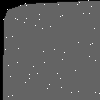

In [508]:
Image.fromarray(mm[:100, :100])

In [509]:
findSmallestDistance(to_group.coords, parent.coords)

210.58798372247566

In [510]:
intersectPolygon(to_group.coords, parent.coords)

True

In [600]:
#give results as [level_color, ...]
def analysis_block(image, results):
    level_color = results[0]
    width, height = image.size
    min_color = 255
    count = 0
    for i in range(width):
        for j in range(height):
            if image.getpixel((i,j)) > level_color:
                if image.getpixel((i,j)) < min_color:
                    min_color = image.getpixel((i,j))
                if image.getpixel((i,j)) == 255:
                    count+= 1 
    if min_color > level_color:
        level_color = min_color
        return [level_color, count], True
    else:
        return [level_color, count], False


In [601]:
analysis_block(img, [0])

([10, 4990], True)

In [10]:
import networkx as nx

graph = nx.Graph()

In [6]:

#comment mapper les résolutions aux patchs

def build_graph(image_path, image_name, scale_factor, max_res_level, tile_width, tile_height, func, G):
    #open image of a specific file at corresponding res_level
    mm = tifffile.memmap(image_path+ "/1/" + image_name)
    count = 0
    for i in range(int(mm.shape[0]/tile_width)+1):
        for j in range(int(mm.shape[1]/tile_height)+1):
            x_max = min((i+1)*tile_width, mm.shape[0])
            y_max = min((j+1)*tile_height, mm.shape[1])
            tile = mm[i*tile_width:x_max, j*tile_height:y_max]             
            tile = Image.fromarray(tile)
            #print("I'm tile "+ str(i) + " " + str(j))
            results = go_through_resolution(image_path, image_name, scale_factor, 1, max_res_level, tile, tile.size[0], tile.size[1], i*tile_width , j*tile_height, [0])
            
            count += 0 if results is None else results[1]
            #print(results[1], count)
            print("Moving to the next tile")
    return count

    
    

In [7]:
def go_through_resolution(image_path, image_name, scale_factor, res_level, max_res_level, tile, tile_width, tile_height, position_x, position_y, results):
    #print("res: ")
    #print(results)
    results, zoom_in = analysis_block(tile, results)
    #print("zoom_in: "+ str(zoom_in))
    #print(results[1])
    #add node in the graph
    if zoom_in: 
        if scale_factor*res_level <= max_res_level:
            print("Scale_factor: " + str(scale_factor*res_level))
            mm = tifffile.memmap(image_path+ "/" + str(res_level*scale_factor) + "/" + image_name)
            #print(mm.shape)
            new_position_x = position_x*scale_factor
            new_position_y = position_y*scale_factor
            #print("My parent is at position: ")
            #print(new_position_x, new_position_x + scale_factor*tile_width, new_position_y, new_position_y + tile_height*scale_factor)
            for i in range(scale_factor):
                for j in range(scale_factor):
                    #print("I'm subtile "+ str(i) + " " + str(j))
                    #print("I'm at position:")
                    #print((new_position_x+i*tile_width,new_position_x+(i+1)*tile_width), (new_position_y+j*tile_height,new_position_y+(j+1)*tile_height))
                    tile = Image.fromarray(mm[new_position_x+i*tile_width:new_position_x+(i+1)*tile_width, new_position_y+j*tile_height:new_position_y+(j+1)*tile_height])           
                    #print(new_position_x +i*tile_width, new_position_x +(i+1)*tile_width )
                    #print(new_position_y+j*tile_height, new_position_y+(j+1)*tile_height )
                    results = go_through_resolution(image_path, image_name, scale_factor, res_level*scale_factor, max_res_level, tile, tile.size[0], tile.size[1], new_position_x, new_position_y, results)
                    #if results is None: print("It is None")
                                                    
            #print("End of loop")
            print(scale_factor*res_level)
            if scale_factor*res_level == max_res_level:
                #print("I'm out here")
                #print(results)
                return results
        else:
            #print(0 if results[1] is None else "None" )
            print(scale_factor*res_level)
            print(results)
            return results #0 if results[1] is None else results[1]    
    else:
        #print(0 if results[1] is None else "None" )
        #print(results)
        return results #0 if results[1] is None else results[1]     

In [8]:
res = build_graph("./Test_image", "S35L1-Scene-18-QUADc3.tif", 2, 8, 50, 50, analysis_block, G)

NameError: name 'analysis_block' is not defined

In [9]:
res

NameError: name 'res' is not defined

In [10]:
mm = tifffile.memmap("./Test_image"+ "/1/S35L1-Scene-18-QUADc3.tif")

NameError: name 'tifffile' is not defined

In [11]:
mm.shape

NameError: name 'mm' is not defined

In [67]:
import time, os, sys
from cellpose import utils, io, models 

def decision_block(image):
    print("Cellpose will start for image {}".format("S35"))
    image.save("./S35.tif")
    image = io.imread("./S35.tif")
    model = models.CellposeModel(gpu=False, model_type='/home/mariereinbigler/.cellpose/models/CP_20220420_140301')

    channels = [[3,0]]

    t1=time.time()

    masks, flows, styles = model.eval(image, diameter=50, flow_threshold=0.5, resample=True, channels=channels)    

    t2 =  time.time()

    print("Segmentation done in {} seconds".format(t2-t1))

    # save results as png

    io.save_to_png(image, masks, flows, "out_filename")

    t3 =  time.time()

    #outlines = utils.outlines_list(masks)
    #io.outlines_to_text(out_filename, outlines)

    #t3 =  time.time()
    '''
    times = open(out_path + "/" + times_filename, "a")
    times.write("{};{};{};{};\n".format(out_filename, t2-t1, t3-t2, t3-t1))
    times.close()
    '''
    if np.all(masks==0):
        return 0, False
    else:
        count = len(np.unique(masks))
        #print(count)
        return count, True

In [92]:
def go_through_resolution_V2(image_path, image_name, scale_factor, res_level, max_res_level, tile, tile_width, tile_height, position_x, position_y):
    global global_count
    #print("res: ")
    #print(results)
    count, zoom_in = decision_block(tile)
    #print("count : " + str(count))
    #print("zoom_in : " + str(zoom_in))
    #print("zoom_in: "+ str(zoom_in))
    #print(results[1])
    #add node in the graph
    if zoom_in: 
        print("count zoom in:" + str(count))
        if scale_factor*res_level <= max_res_level:
            print("Scale_factor: " + str(scale_factor*res_level))
            mm = tifffile.memmap(image_path+ "/" + str(res_level*scale_factor) + "/" + image_name)
            #print(mm.shape)
            new_position_x = position_x*scale_factor
            new_position_y = position_y*scale_factor
            #print("My parent is at position: ")
            #print(new_position_x, new_position_x + scale_factor*tile_width, new_position_y, new_position_y + tile_height*scale_factor)
            for i in range(scale_factor):
                for j in range(scale_factor):
                    #print("I'm subtile "+ str(i) + " " + str(j))
                    #print("I'm at position:")
                    #print((new_position_x+i*tile_width,new_position_x+(i+1)*tile_width), (new_position_y+j*tile_height,new_position_y+(j+1)*tile_height))
                    tile = Image.fromarray(mm[new_position_x+i*tile_width:new_position_x+(i+1)*tile_width, new_position_y+j*tile_height:new_position_y+(j+1)*tile_height])           
                    #print(new_position_x +i*tile_width, new_position_x +(i+1)*tile_width )
                    #print(new_position_y+j*tile_height, new_position_y+(j+1)*tile_height )
                    go_through_resolution_V2(image_path, image_name, scale_factor, res_level*scale_factor, max_res_level, tile, tile.size[0], tile.size[1], new_position_x, new_position_y) 
                    #if results is None: print("It is None")
            '''                                       
            #print("End of loop")
            print(scale_factor*res_level)
            if scale_factor*res_level == max_res_level:
                #print("I'm out here")
                #print("count" + str(count))
                global_count+= count if count is not None else 0
                return 
            '''
        else:
            print("count without extra zoom:" + str(count))
            #print(0 if results[1] is None else "None" )
            #print(scale_factor*res_level)
            #print("I'm after")
            #print("count " +  str(count))
            print("count: " + str(count))
            global_count+= count #if count is not None else 0
            print("global_count " + str(global_count))
            return  #0 if results[1] is None else results[1]    
    else:
        #print(0 if results[1] is None else "None" )
        #print(results)
        #print("I'm at the end")
        print("count :" + str(count))
        global_count+= count #if count is not None else 0
        return #results #0 if results[1] is None else results[1]   

In [93]:
def build_graph_V2(image_path, image_name, scale_factor, max_res_level, tile_width, tile_height, func):
    global global_count
    #open image of a specific file at corresponding res_level
    mm = tifffile.memmap(image_path+ "/1/" + image_name)
    G = nx.grid_graph(((int(mm.shape[0]/tile_width)+2), int(mm.shape[1]/tile_height)+2), periodic=False)
    for i in range(int(mm.shape[0]/tile_width)+1):
        for j in range(int(mm.shape[1]/tile_height)+1):
            x_max = min((i+1)*tile_width, mm.shape[0])
            y_max = min((j+1)*tile_height, mm.shape[1])
            tile = mm[i*tile_width:x_max, j*tile_height:y_max]             
            tile = Image.fromarray(tile)
            #print("I'm tile "+ str(i) + " " + str(j))
            
            global_count = 0
            go_through_resolution_V2(image_path, image_name, scale_factor, 1, max_res_level, tile, tile.size[0], tile.size[1], i*tile_width , j*tile_height)
            
            #count += 0 if results is None else results[1]
            #print(results[1], count)
            print("Moving to the next tile")
            G.nodes[i,j]["count"] = global_count
            print("Global : " + str(G.nodes[i,j]["count"]))
    
    return graph

In [ ]:
global_count = 0
graph = build_graph_V2("./Test_image", "S35L1-Scene-18-QUADc3.tif", 2, 8, 256, 256, decision_block)

Cellpose will start for image S35
Segmentation done in 0.3069009780883789 seconds
count :0
Moving to the next tile
Global : 0
Cellpose will start for image S35
Segmentation done in 0.41040849685668945 seconds
count :0
Moving to the next tile
Global : 0
Cellpose will start for image S35


Segmentation done in 0.3066444396972656 seconds
count :0
Moving to the next tile
Global : 0
Cellpose will start for image S35
Segmentation done in 0.41118311882019043 seconds
count zoom in:3
Scale_factor: 2
Cellpose will start for image S35
Segmentation done in 0.3527262210845947 seconds
count zoom in:6
Scale_factor: 4
Cellpose will start for image S35
Segmentation done in 0.34490299224853516 seconds
count zoom in:2
Scale_factor: 8
Cellpose will start for image S35
Segmentation done in 0.3306736946105957 seconds
count :0
Cellpose will start for image S35
Segmentation done in 0.3598968982696533 seconds
count :0
Cellpose will start for image S35
Segmentation done in 0.31087493896484375 seconds
count :0
Cellpose will start for image S35
Segmentation done in 0.3104517459869385 seconds
count :0
Cellpose will start for image S35
Segmentation done in 0.36330604553222656 seconds
count :0
Cellpose will start for image S35
Segmentation done in 0.45890116691589355 seconds
count zoom in:6
Scale_fa

count :0
Cellpose will start for image S35
Segmentation done in 0.5534865856170654 seconds
count zoom in:16
Scale_factor: 8
Cellpose will start for image S35
Segmentation done in 0.35202717781066895 seconds
count :0
Cellpose will start for image S35
Segmentation done in 0.3166038990020752 seconds
count :0
Cellpose will start for image S35
Segmentation done in 0.3211491107940674 seconds
count :0
Cellpose will start for image S35
Segmentation done in 0.3588531017303467 seconds
count :0
Moving to the next tile
Global : 0
Cellpose will start for image S35
Segmentation done in 0.7204997539520264 seconds
count zoom in:10
Scale_factor: 2
Cellpose will start for image S35
Segmentation done in 0.7333579063415527 seconds
count zoom in:54
Scale_factor: 4
Cellpose will start for image S35
Segmentation done in 0.8879685401916504 seconds
count zoom in:39
Scale_factor: 8
Cellpose will start for image S35
Segmentation done in 0.9052004814147949 seconds
count zoom in:11
count without extra zoom:11
coun

count zoom in:16
count without extra zoom:16
count: 16
global_count 550
Cellpose will start for image S35
Segmentation done in 0.8550126552581787 seconds
count zoom in:34
Scale_factor: 8
Cellpose will start for image S35
Segmentation done in 0.909609317779541 seconds
count zoom in:11
count without extra zoom:11
count: 11
global_count 561
Cellpose will start for image S35
Segmentation done in 1.0253794193267822 seconds
count zoom in:13
count without extra zoom:13
count: 13
global_count 574
Cellpose will start for image S35
Segmentation done in 1.0845904350280762 seconds
count zoom in:15
count without extra zoom:15
count: 15
global_count 589
Cellpose will start for image S35
Segmentation done in 1.1445424556732178 seconds
count zoom in:16
count without extra zoom:16
count: 16
global_count 605
Cellpose will start for image S35
Segmentation done in 0.890094518661499 seconds
count zoom in:32
Scale_factor: 8
Cellpose will start for image S35
Segmentation done in 0.8666138648986816 seconds
co

count zoom in:9
count without extra zoom:9
count: 9
global_count 226
Cellpose will start for image S35
Segmentation done in 1.1969900131225586 seconds
count zoom in:12
count without extra zoom:12
count: 12
global_count 238
Cellpose will start for image S35
Segmentation done in 1.0688915252685547 seconds
count zoom in:12
count without extra zoom:12
count: 12
global_count 250
Cellpose will start for image S35
Segmentation done in 0.8680901527404785 seconds
count zoom in:26
Scale_factor: 8
Cellpose will start for image S35
Segmentation done in 0.9805757999420166 seconds
count zoom in:17
count without extra zoom:17
count: 17
global_count 267
Cellpose will start for image S35
Segmentation done in 1.0571973323822021 seconds
count zoom in:9
count without extra zoom:9
count: 9
global_count 276
Cellpose will start for image S35
Segmentation done in 1.1815221309661865 seconds
count zoom in:12
count without extra zoom:12
count: 12
global_count 288
Cellpose will start for image S35
Segmentation do

count zoom in:9
count without extra zoom:9
count: 9
global_count 776
Cellpose will start for image S35
Segmentation done in 1.2690505981445312 seconds
count zoom in:12
count without extra zoom:12
count: 12
global_count 788
Cellpose will start for image S35
Segmentation done in 1.157787561416626 seconds
count zoom in:12
count without extra zoom:12
count: 12
global_count 800
Moving to the next tile
Global : 800
Cellpose will start for image S35
Segmentation done in 0.30875492095947266 seconds
count :0
Moving to the next tile
Global : 0
Cellpose will start for image S35
Segmentation done in 0.3724231719970703 seconds
count :0
Moving to the next tile
Global : 0
Cellpose will start for image S35
Segmentation done in 0.3263363838195801 seconds
count :0
Moving to the next tile
Global : 0
Cellpose will start for image S35


/home/mariereinbigler/miniconda3/envs/plots/lib/python3.8/site-packages/cellpose/transforms.py:352: UserWarning: chan to seg' has value range of ZERO
  warnings.warn("chan to seg' has value range of ZERO")


Segmentation done in 0.2511782646179199 seconds
count :0
Moving to the next tile
Global : 0
Cellpose will start for image S35
Segmentation done in 1.076249599456787 seconds
count :0
Moving to the next tile
Global : 0
Cellpose will start for image S35
Segmentation done in 0.41540050506591797 seconds
count :0
Moving to the next tile
Global : 0
Cellpose will start for image S35
Segmentation done in 0.40782833099365234 seconds
count zoom in:5
Scale_factor: 2
Cellpose will start for image S35
Segmentation done in 0.8087007999420166 seconds
count zoom in:40
Scale_factor: 4
Cellpose will start for image S35
Segmentation done in 0.7945563793182373 seconds
count zoom in:48
Scale_factor: 8
Cellpose will start for image S35
Segmentation done in 0.8636395931243896 seconds
count zoom in:22
count without extra zoom:22
count: 22
global_count 22
Cellpose will start for image S35
Segmentation done in 0.7512373924255371 seconds
count zoom in:20
count without extra zoom:20
count: 20
global_count 42
Cellp

Segmentation done in 0.8980762958526611 seconds
count zoom in:22
count without extra zoom:22
count: 22
global_count 772
Cellpose will start for image S35
Segmentation done in 0.7226419448852539 seconds
count zoom in:20
count without extra zoom:20
count: 20
global_count 792
Cellpose will start for image S35
Segmentation done in 1.0333797931671143 seconds
count zoom in:11
count without extra zoom:11
count: 11
global_count 803
Cellpose will start for image S35
Segmentation done in 0.7953112125396729 seconds
count zoom in:22
count without extra zoom:22
count: 22
global_count 825
Cellpose will start for image S35
Segmentation done in 0.7448110580444336 seconds
count zoom in:47
Scale_factor: 8
Cellpose will start for image S35
Segmentation done in 0.8850991725921631 seconds
count zoom in:22
count without extra zoom:22
count: 22
global_count 847
Cellpose will start for image S35
Segmentation done in 0.7504594326019287 seconds
count zoom in:20
count without extra zoom:20
count: 20
global_count

Segmentation done in 0.6846897602081299 seconds
count zoom in:16
count without extra zoom:16
count: 16
global_count 275
Cellpose will start for image S35
Segmentation done in 0.7585985660552979 seconds
count zoom in:37
Scale_factor: 8
Cellpose will start for image S35
Segmentation done in 0.7188467979431152 seconds
count zoom in:14
count without extra zoom:14
count: 14
global_count 289
Cellpose will start for image S35
Segmentation done in 0.7688794136047363 seconds
count zoom in:16
count without extra zoom:16
count: 16
global_count 305
Cellpose will start for image S35
Segmentation done in 0.6220235824584961 seconds
count zoom in:9
count without extra zoom:9
count: 9
global_count 314
Cellpose will start for image S35
Segmentation done in 0.686492919921875 seconds
count zoom in:16
count without extra zoom:16
count: 16
global_count 330
Cellpose will start for image S35
Segmentation done in 0.6821422576904297 seconds
count zoom in:40
Scale_factor: 8
Cellpose will start for image S35
Segm

Segmentation done in 0.6659514904022217 seconds
count zoom in:16
count without extra zoom:16
count: 16
global_count 880
Moving to the next tile
Global : 880
Cellpose will start for image S35
Segmentation done in 0.3490865230560303 seconds
count zoom in:3
Scale_factor: 2
Cellpose will start for image S35
Segmentation done in 0.7062630653381348 seconds
count zoom in:63
Scale_factor: 4
Cellpose will start for image S35
Segmentation done in 0.7223024368286133 seconds
count zoom in:37
Scale_factor: 8
Cellpose will start for image S35
Segmentation done in 0.9397449493408203 seconds
count zoom in:17
count without extra zoom:17
count: 17
global_count 17
Cellpose will start for image S35
Segmentation done in 0.7450160980224609 seconds
count zoom in:10
count without extra zoom:10
count: 10
global_count 27
Cellpose will start for image S35
Segmentation done in 0.9073772430419922 seconds
count zoom in:15
count without extra zoom:15
count: 15
global_count 42
Cellpose will start for image S35
Segmen

Segmentation done in 0.7559814453125 seconds
count zoom in:10
count without extra zoom:10
count: 10
global_count 557
Cellpose will start for image S35
Segmentation done in 0.9112093448638916 seconds
count zoom in:15
count without extra zoom:15
count: 15
global_count 572
Cellpose will start for image S35
Segmentation done in 0.891115665435791 seconds
count zoom in:11
count without extra zoom:11
count: 11
global_count 583
Cellpose will start for image S35
Segmentation done in 0.8219060897827148 seconds
count zoom in:30
Scale_factor: 8
Cellpose will start for image S35
Segmentation done in 0.919090747833252 seconds
count zoom in:17
count without extra zoom:17
count: 17
global_count 600
Cellpose will start for image S35
Segmentation done in 0.8634567260742188 seconds
count zoom in:10
count without extra zoom:10
count: 10
global_count 610
Cellpose will start for image S35
Segmentation done in 0.8956599235534668 seconds
count zoom in:15
count without extra zoom:15
count: 15
global_count 625


Segmentation done in 0.9457874298095703 seconds
count zoom in:35
Scale_factor: 8
Cellpose will start for image S35
Segmentation done in 1.0049364566802979 seconds
count zoom in:9
count without extra zoom:9
count: 9
global_count 264
Cellpose will start for image S35
Segmentation done in 0.973290205001831 seconds
count zoom in:15
count without extra zoom:15
count: 15
global_count 279
Cellpose will start for image S35
Segmentation done in 0.9733390808105469 seconds
count zoom in:11
count without extra zoom:11
count: 11
global_count 290
Cellpose will start for image S35
Segmentation done in 0.975473165512085 seconds
count zoom in:16
count without extra zoom:16
count: 16
global_count 306
Cellpose will start for image S35
Segmentation done in 0.820115327835083 seconds
count zoom in:23
Scale_factor: 8
Cellpose will start for image S35
Segmentation done in 0.9561829566955566 seconds
count zoom in:9
count without extra zoom:9
count: 9
global_count 315
Cellpose will start for image S35
Segmentat

Segmentation done in 0.538804292678833 seconds
count zoom in:2
Scale_factor: 2
Cellpose will start for image S35
Segmentation done in 0.5417885780334473 seconds
count zoom in:4
Scale_factor: 4
Cellpose will start for image S35
Segmentation done in 0.5618045330047607 seconds
count zoom in:16
Scale_factor: 8
Cellpose will start for image S35
Segmentation done in 0.6523709297180176 seconds
count zoom in:9
count without extra zoom:9
count: 9
global_count 9
Cellpose will start for image S35
Segmentation done in 0.3227193355560303 seconds
count :0
Cellpose will start for image S35
Segmentation done in 0.8498280048370361 seconds
count zoom in:11
count without extra zoom:11
count: 11
global_count 20
Cellpose will start for image S35
Segmentation done in 0.5214219093322754 seconds
count zoom in:6
count without extra zoom:6
count: 6
global_count 26
Cellpose will start for image S35
Segmentation done in 0.3223268985748291 seconds
count :0
Cellpose will start for image S35
Segmentation done in 0.6

Segmentation done in 0.4868948459625244 seconds
count :0
Cellpose will start for image S35
Segmentation done in 0.3673079013824463 seconds
count zoom in:3
count without extra zoom:3
count: 3
global_count 15
Cellpose will start for image S35
Segmentation done in 0.4173877239227295 seconds
count :0
Cellpose will start for image S35
Segmentation done in 0.5483062267303467 seconds
count zoom in:13
Scale_factor: 8
Cellpose will start for image S35
Segmentation done in 0.42603588104248047 seconds
count :0
Cellpose will start for image S35
Segmentation done in 0.39014720916748047 seconds
count :0
Cellpose will start for image S35
Segmentation done in 0.34283947944641113 seconds
count :0
Cellpose will start for image S35
Segmentation done in 0.3798377513885498 seconds
count zoom in:3
count without extra zoom:3
count: 3
global_count 18
Cellpose will start for image S35
Segmentation done in 0.5684285163879395 seconds
count zoom in:20
Scale_factor: 4
Cellpose will start for image S35
Segmentation

In [62]:
graph.nodes

NodeView(())

In [56]:
G = nx.grid_graph((10,10))


G.nodes[0,0]['count'] = 10

G.nodes

NodeView(((0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (9, 0), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)))

In [8]:
import tifffile

In [12]:
mm = tifffile.memmap("./Test_image"+ "/1/S35L1-Scene-18-QUADc3.tif")

In [14]:
mm.shape

(1636, 1820, 3)

In [20]:
im=Image.fromarray(mm[100:200])

In [22]:
im.save("./S35.tif")

In [24]:
image = io.imread("./S35.tif")

In [25]:
image

array([[[  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [1]:
image.type

NameError: name 'image' is not defined

In [27]:
mm.type

AttributeError: 'memmap' object has no attribute 'type'